# Итоговая работа Кашанова Никиты Андреевича

### курс "Data Science" в Обучающем Центре МГТУ им. Н.Э. Баумана

### ноябрь 2024 года

## Кейс «Прогнозирование конечных свойств новых материалов(композиционных материалов)»

##**IMPORT**

In [1]:
#обработка данных и визуализация
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from scipy import stats

#модели машинного обучения и инструменты
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

#глубокое обучение
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dropout
from tensorflow import keras
#метрики оценки
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error, root_mean_squared_error

#сохранение модели
import pickle
from tensorflow.keras import losses
from tensorflow.keras.models import load_model



##**Загрузка наборов данных данных**

In [2]:
#загружаем датасеты
bp = pd.read_excel('/content/drive/MyDrive/Кейс №2/X_bp.xlsx')
nup = pd.read_excel('/content/drive/MyDrive/Кейс №2/X_nup.xlsx')

In [3]:
nup.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [4]:
#объединяем два датасета по столбцу Unnamed: 0 (по индексу)
df = bp.merge(nup, on='Unnamed: 0', how='inner')

In [5]:
# Unnamed: 0 - делаем индексом
df = df.set_index('Unnamed: 0')

In [6]:
#переименуем столбец индексов в id
df = df.rename_axis('id')

In [7]:
#смотрим объединенные датасет
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
id,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [8]:
#проверка на наличие дубликатов
df.duplicated().sum()

0

In [9]:
#информация по датасету
df.info()
#как видно пропусков или нулевых значений нет

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

##**Разведочный анализ данных**

In [10]:
#визуализируем данные

#создание интерактивного графика
fig = go.Figure()

#цикл по всем столбцам
for column in df.columns:
  fig.add_trace(go.Scatter
   (x=df.index,
    y=df[column],
    mode='lines',
    name=column))
# Настройки оформления
fig.update_layout(
    xaxis_title='id',
        hovermode='x unified'
)

# Отображение графика
fig.show()

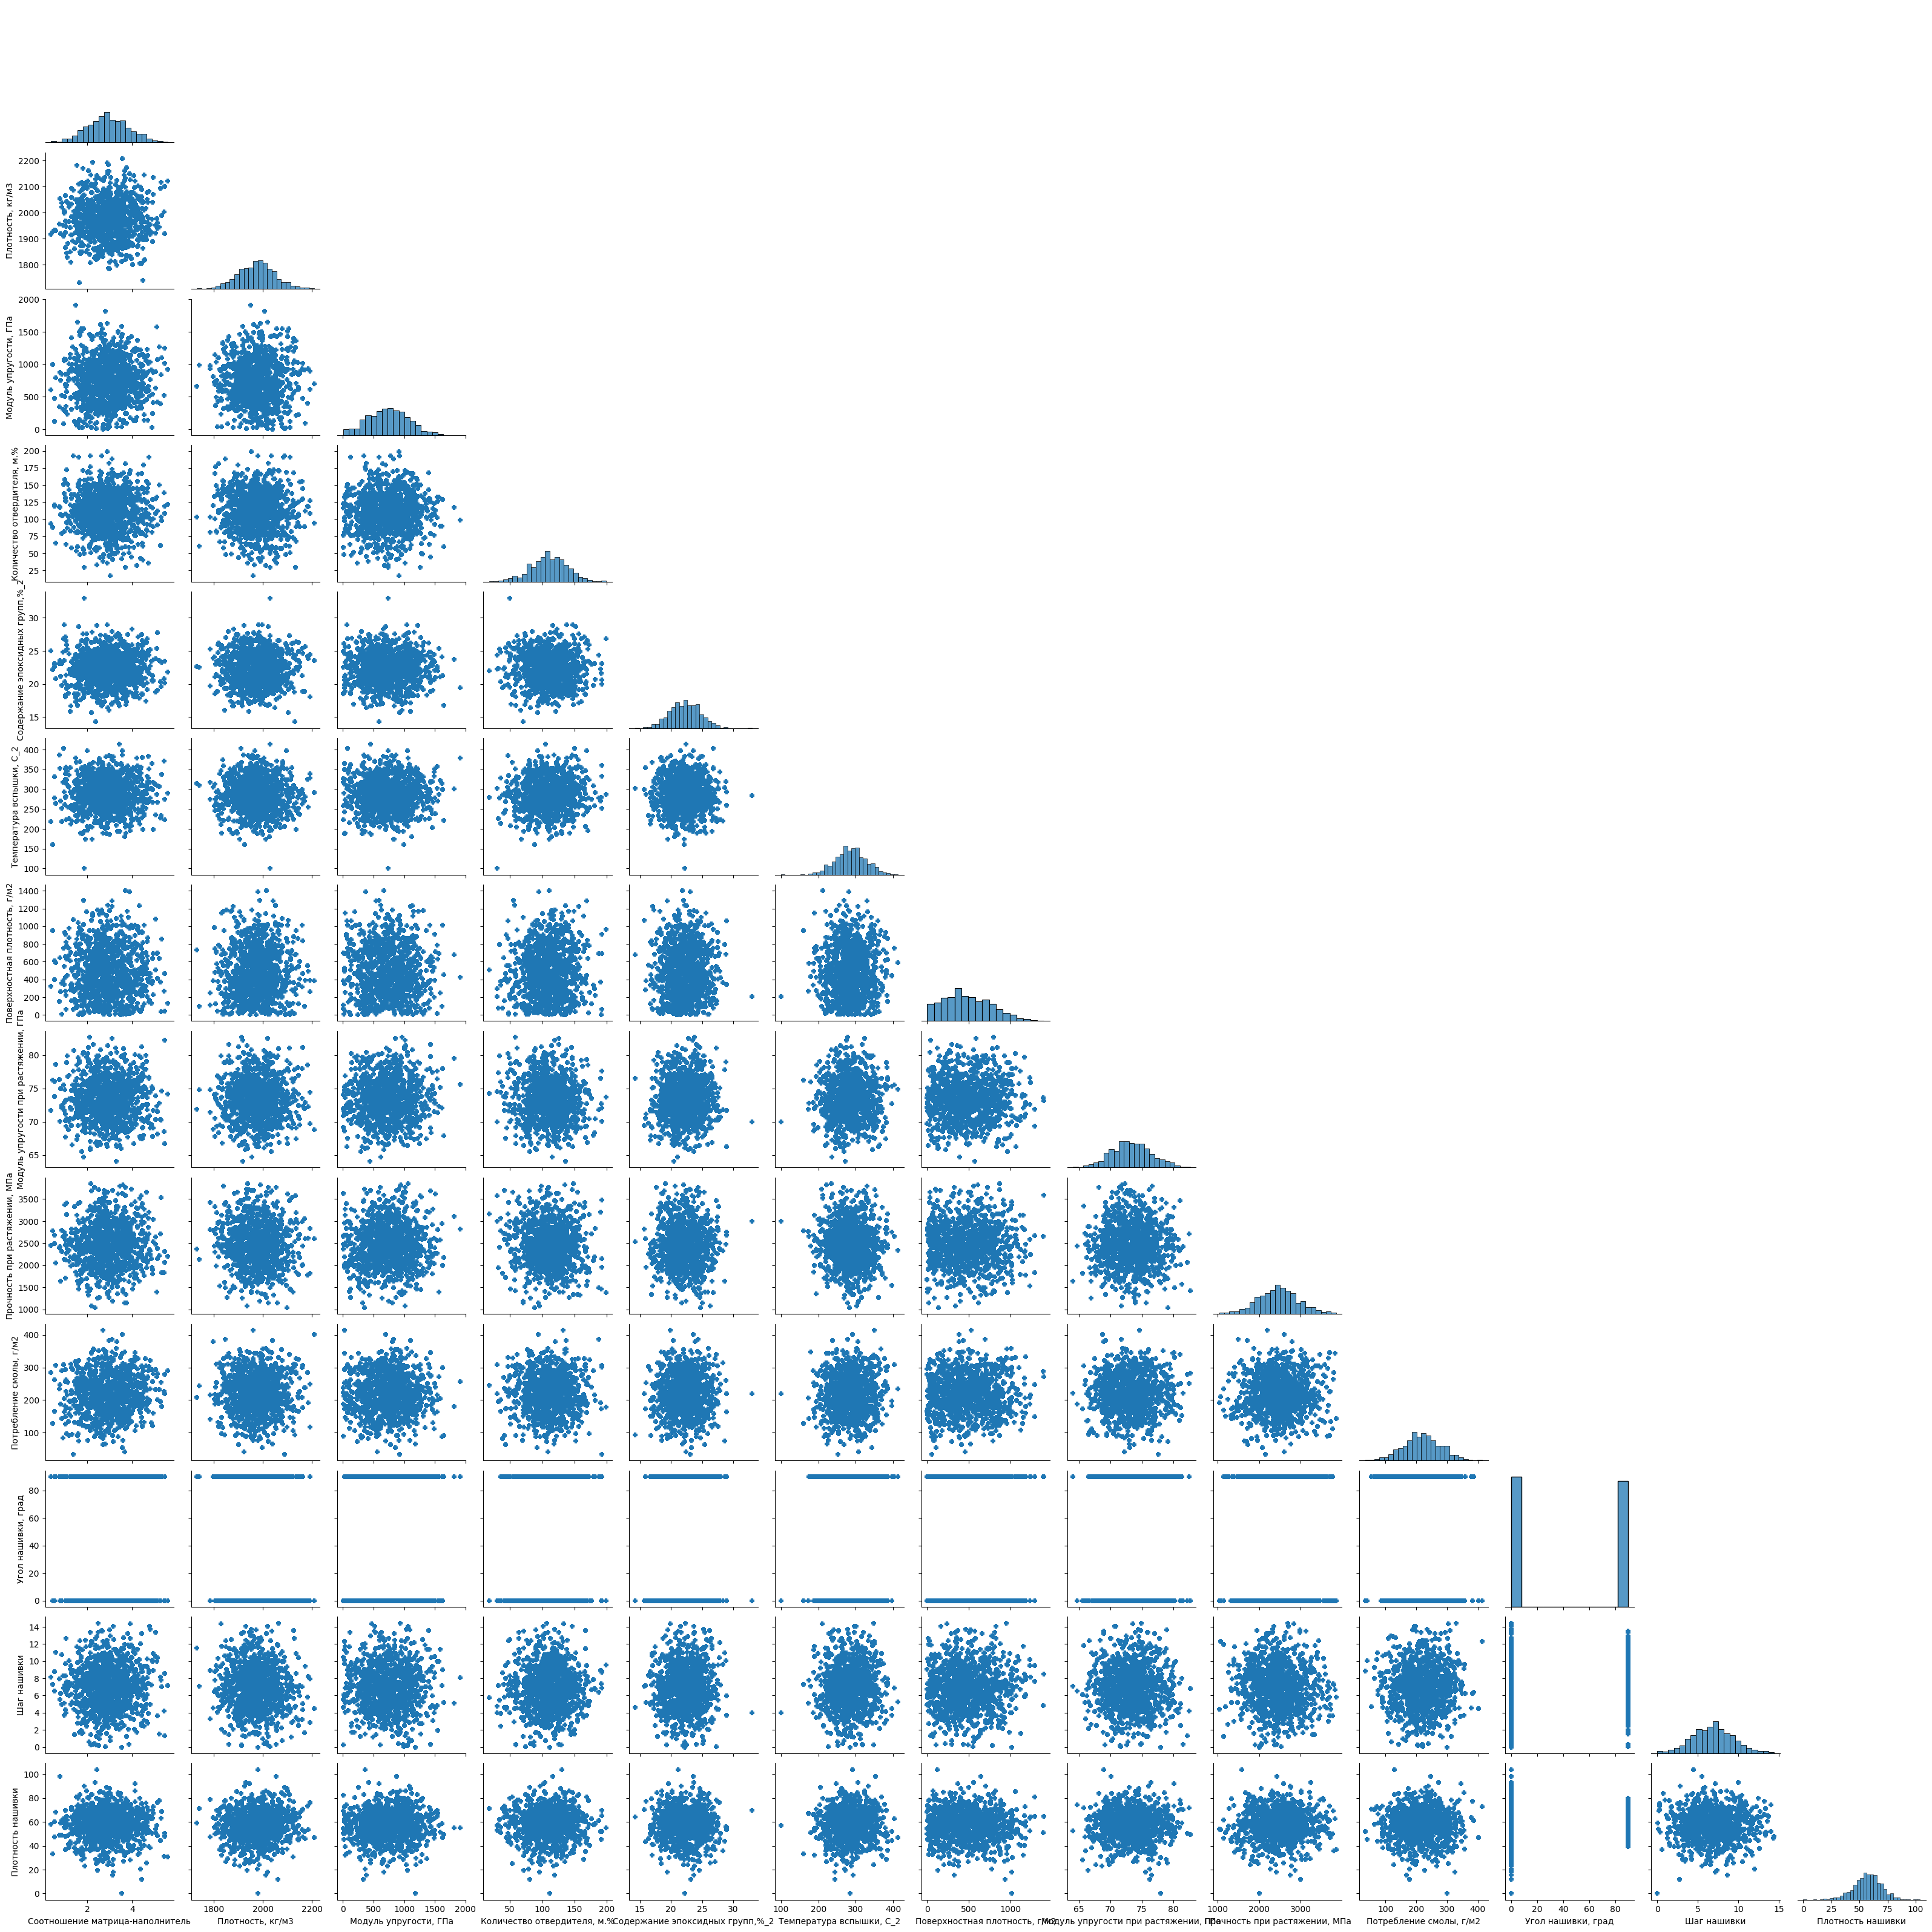

In [11]:
#смотрим корреляцию, распределение данных
sns.pairplot(df, diag_kind = "hist", corner = True, plot_kws = dict(marker = "+", linewidth = 3))

In [12]:
#выведем описательную статистику
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"Модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


Text(0.5, 1.0, 'Корреляционная матрица')

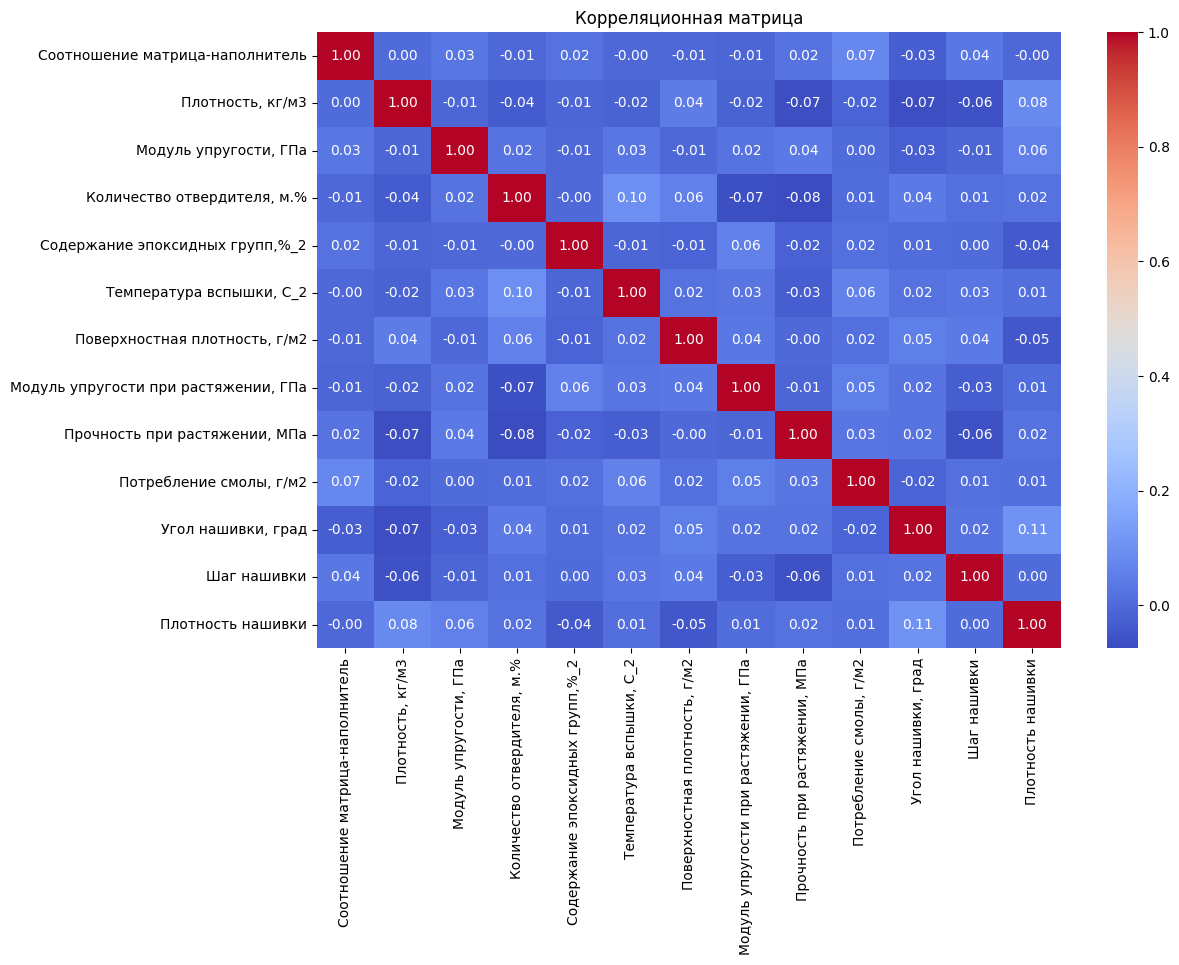

In [13]:
#построим корреляционную матрицу
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
#как видно признаки почти не имеют корреляции

Text(0.5, 0.98, 'Гистограммы признаков')

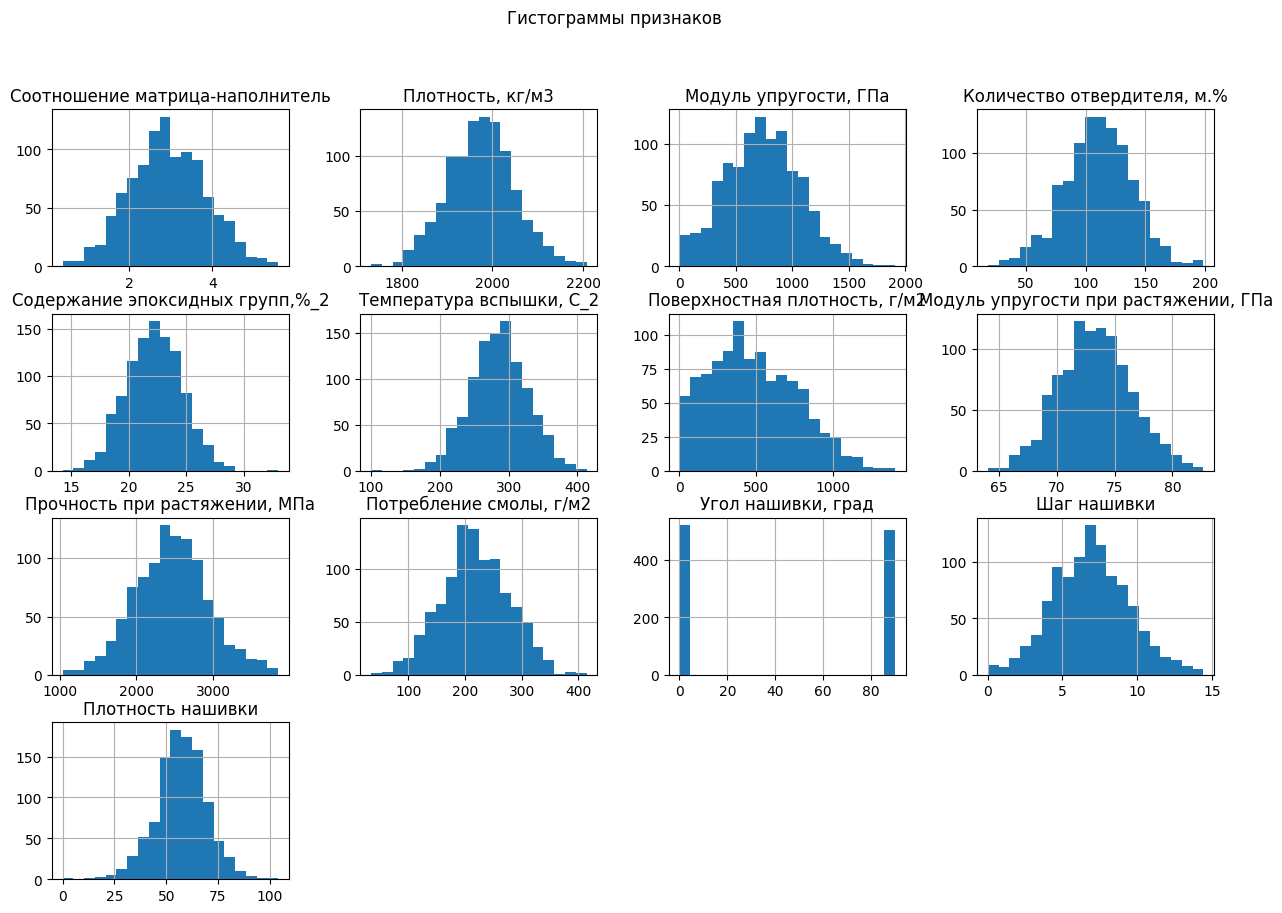

In [14]:
#более подробно смотрим гистограммы
df.hist(bins=20, figsize=(15,10))
plt.suptitle('Гистограммы признаков')

* большинство признаков имеют распределение близкое к нормальному

* угол нашивки имеют специфическое распределение

* поверхностная плотность и потребление смолы - нормалное распределение с некоторым смещением и ассиметрией

* **дополнительно посмотрим** на распределение и выбросы данных, построив диаграммы "квантиль-квантиль"

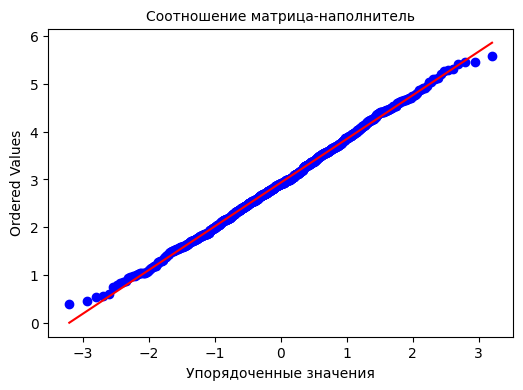

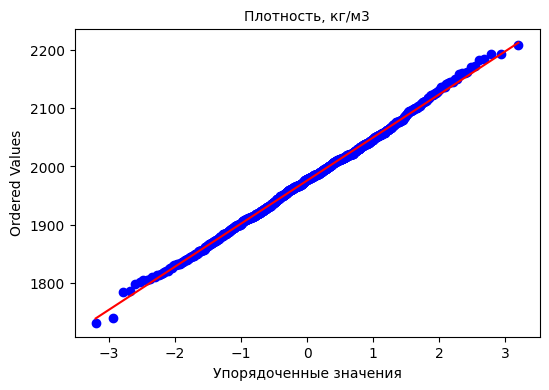

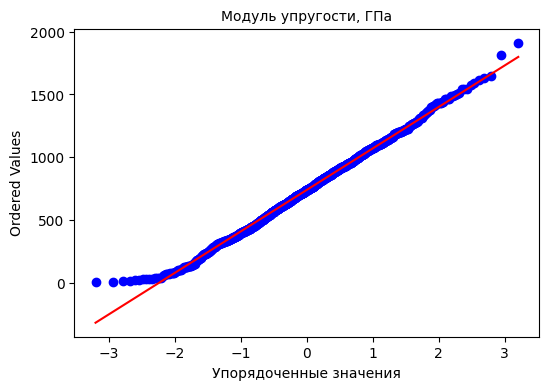

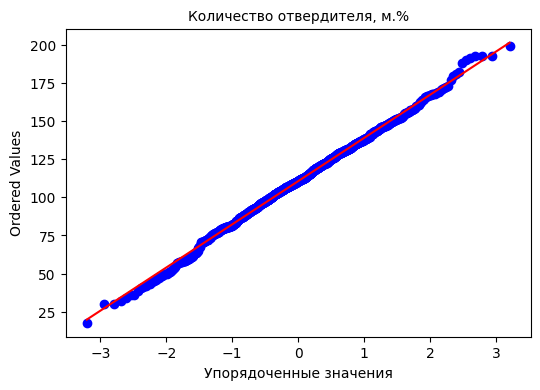

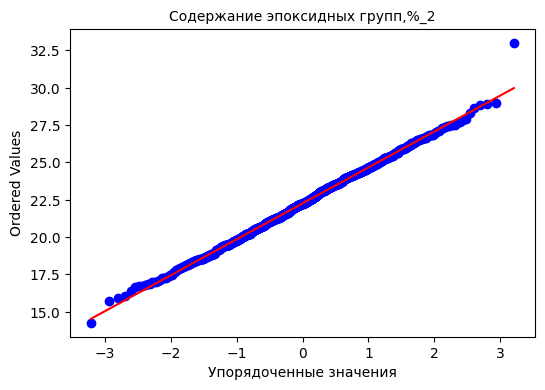

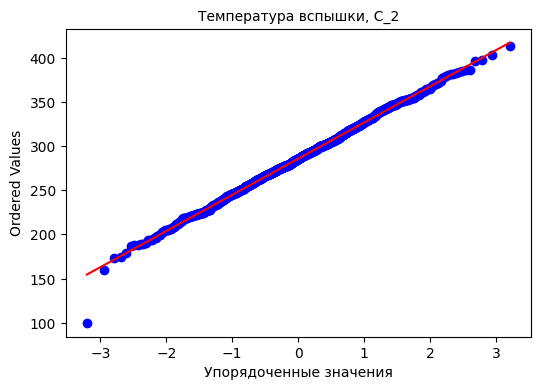

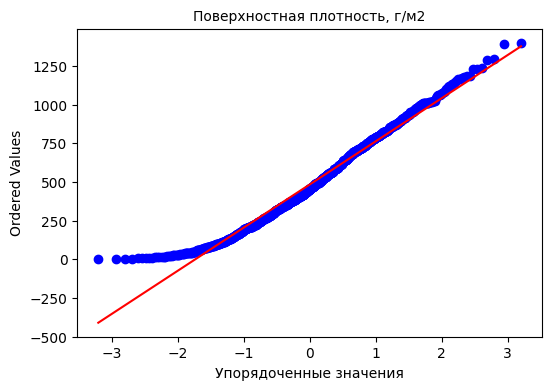

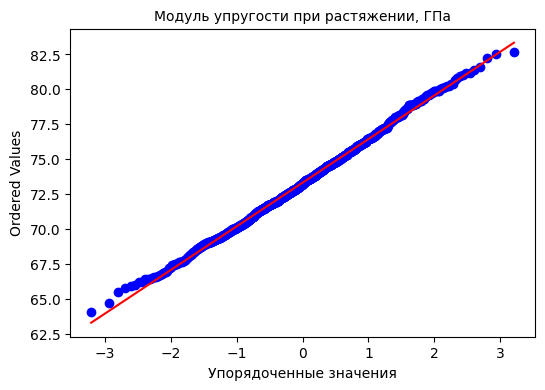

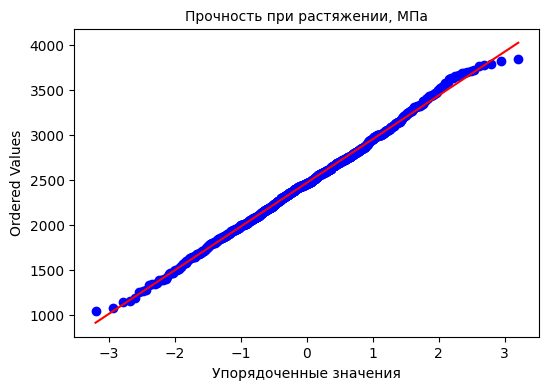

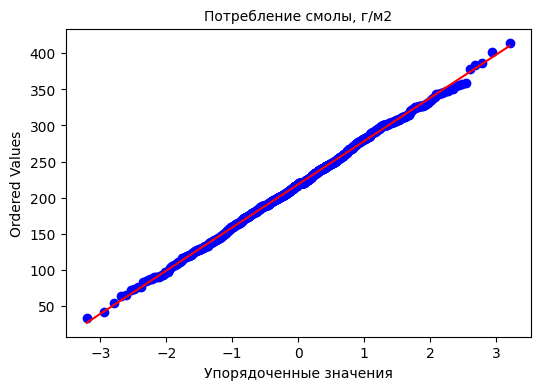

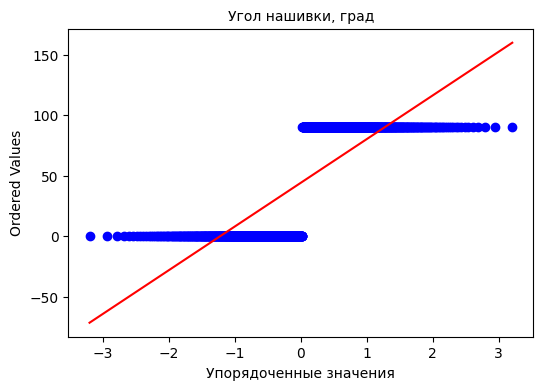

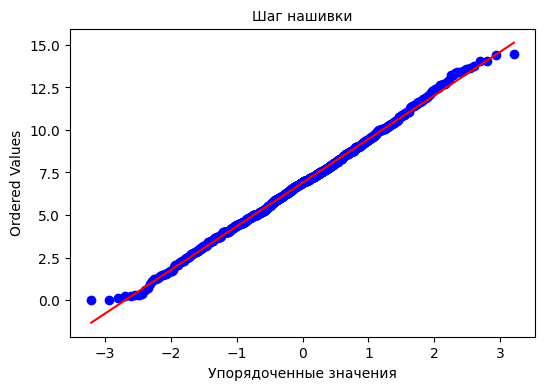

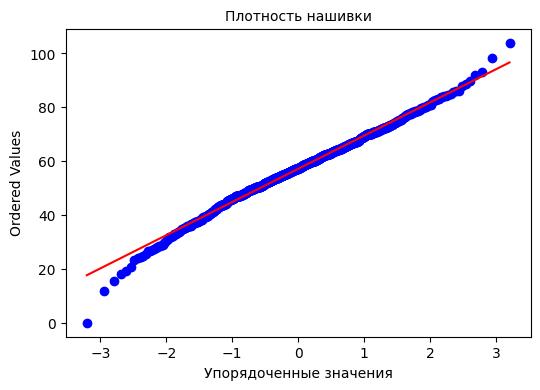

In [15]:
for i in df.columns:
  plt.figure(figsize=(6,4))
  res = stats.probplot(df[i], plot = plt)
  plt.title(i,fontsize = 10)
  plt.xlabel('Теоритические квантили', fontsize=10)
  plt.xlabel('Упорядоченные значения', fontsize=10)
  plt.show()

1. **Соотношение матрица наполнитель**, **плотность**, **кол-во отвердителя**, **Модуль упругости при растяжении**, **Прочность при растяжении и Потребление смолы**, **шаг нашифки**: распределение нормальное небольшие выбросы
2. **Модуль упругости**: легкое отклонение в хвосте (особенность физ. свойств) в целом нормальное. Можно провести лог-преобразование
3. **Содержание эпоксидных групп и температура вспышки**: нормальное, есть выбросы, как вариант удалить их
4. **Поверхностная плотность**: сильное отклонение от нормального, можно сделать лог-нормальное распределение
5. **Угол нашифки**: распределение с двумя дискретными значениями, добавим кодировку
6. **Плотность нашивки**: почти нормальное, но с отклонением в левом хвосте, удалить выбросы?

Проведем лог-преобразования для некоторых признаков, для того, чтобы сгладить хвосты, снизить ассимтрию, и сделать нормальное распределение данных

**Попытка сделать** лог-преобразования ухудшила результаты (**для модуля упругости** и **поверхностной плотности**)

In [16]:
'''
#построим матрицу графиков рассеяния
#для дополнительной оценки зависимости между парами переменных, выявить класстеры и группы данных, посмотреть выбросы
features = list(set(df.columns))
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
grids = sns.PairGrid(df[features], diag_sharey = False, height = 4)
grids.map_upper(sns.kdeplot)
grids.map_diag(sns.histplot, kde = False)
grids.map_lower(sns.scatterplot)
'''

'\n#построим матрицу графиков рассеяния\n#для дополнительной оценки зависимости между парами переменных, выявить класстеры и группы данных, посмотреть выбросы\nfeatures = list(set(df.columns))\nplt.figure(figsize=(10,10))\nsns.set_style("whitegrid")\ngrids = sns.PairGrid(df[features], diag_sharey = False, height = 4)\ngrids.map_upper(sns.kdeplot)\ngrids.map_diag(sns.histplot, kde = False)\ngrids.map_lower(sns.scatterplot)\n'

In [17]:
#проверим датасет на дупликаты
df.duplicated().sum()

0

* На графиках видно, что между признаками корреляция очень слабая (хотя это и было видно в **матрице корреляции**)
* так же стоит отметить, что у большинства признаков один центр (кластер), то есть у данных нет делений на группы

Из разведочного анализа данных понятно, что признаки имеют очень **слабую корреляцию** между собой, **распределение** признаков в целом **нормальное**, **имеются выбросы** в данных, **пропуски и дубликаты отсутствуют**

##**Предобработка данных**

In [18]:
#удалим выбросы, опираясь на Q-Q графики

df = df[df['Температура вспышки, С_2'] > 150]
df = df[df['Содержание эпоксидных групп,%_2'] < 30]
df = df[df['Плотность нашивки'] > 10]

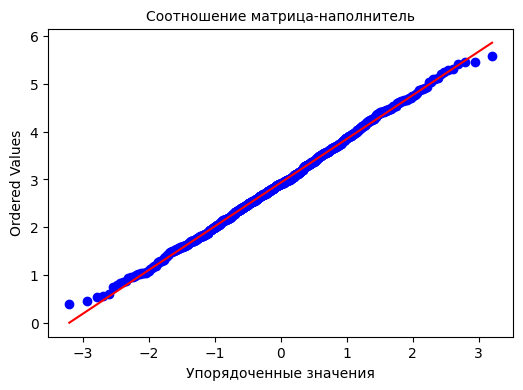

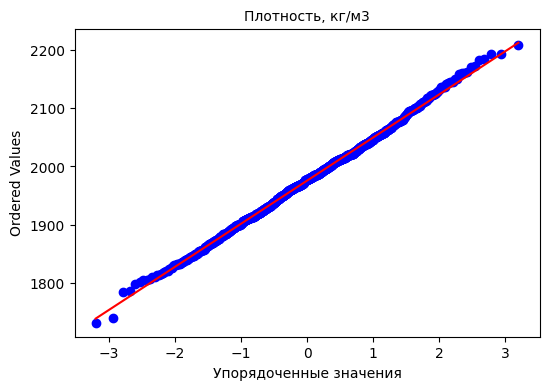

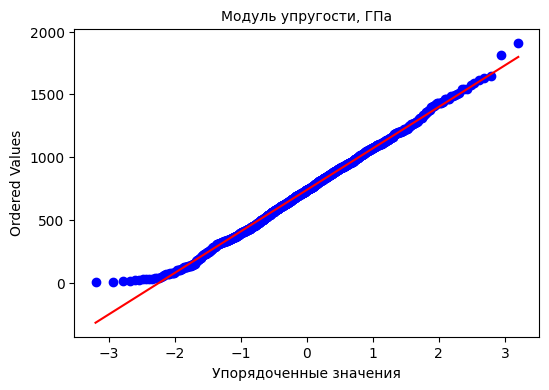

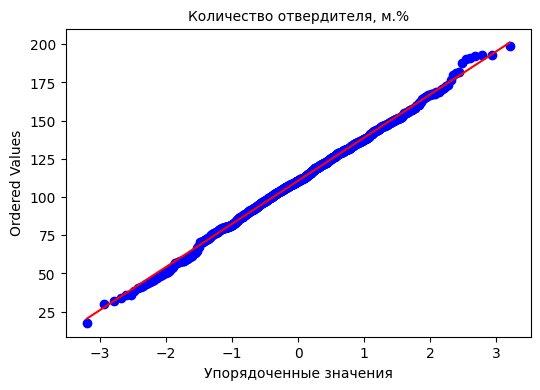

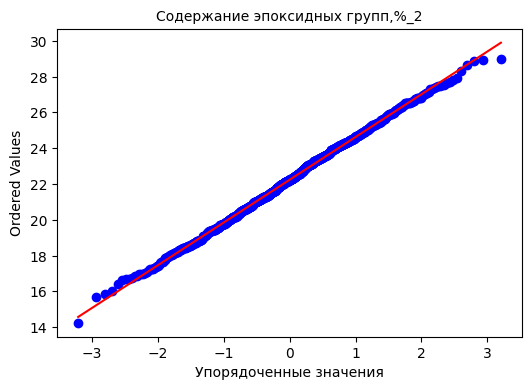

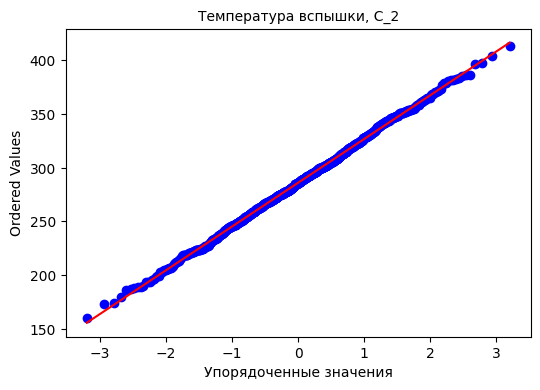

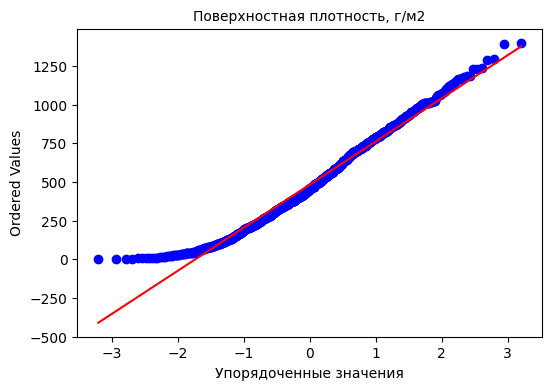

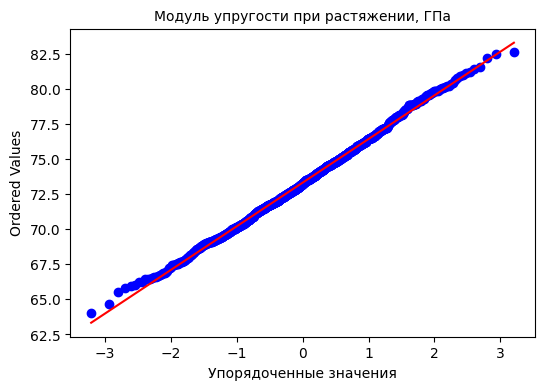

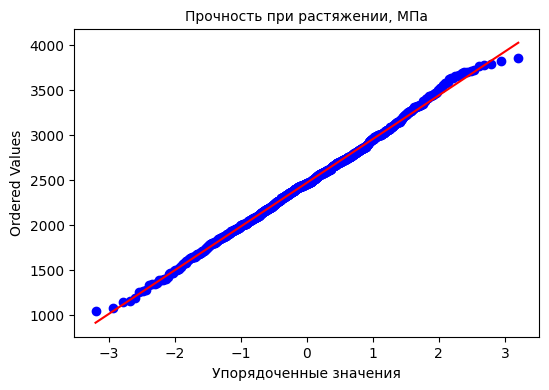

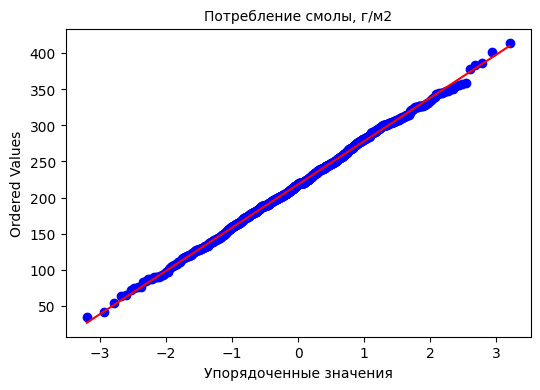

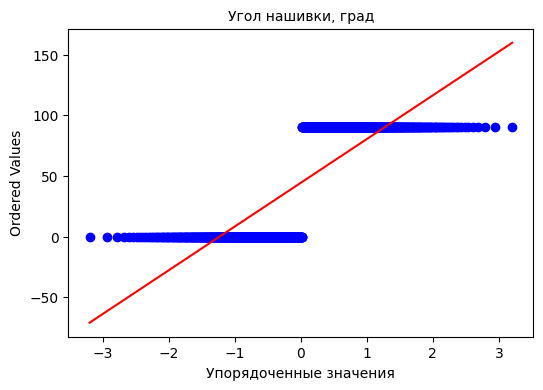

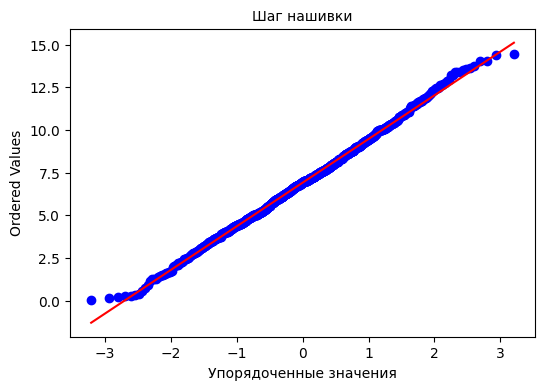

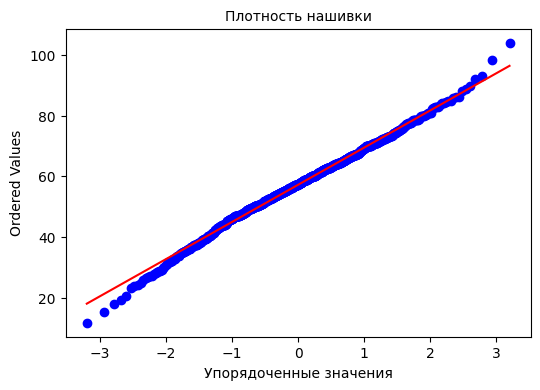

In [19]:
for i in df.columns:
  plt.figure(figsize=(6,4))
  res = stats.probplot(df[i], plot = plt)
  plt.title(i,fontsize = 10)
  plt.xlabel('Теоритические квантили', fontsize=10)
  plt.xlabel('Упорядоченные значения', fontsize=10)
  plt.show()

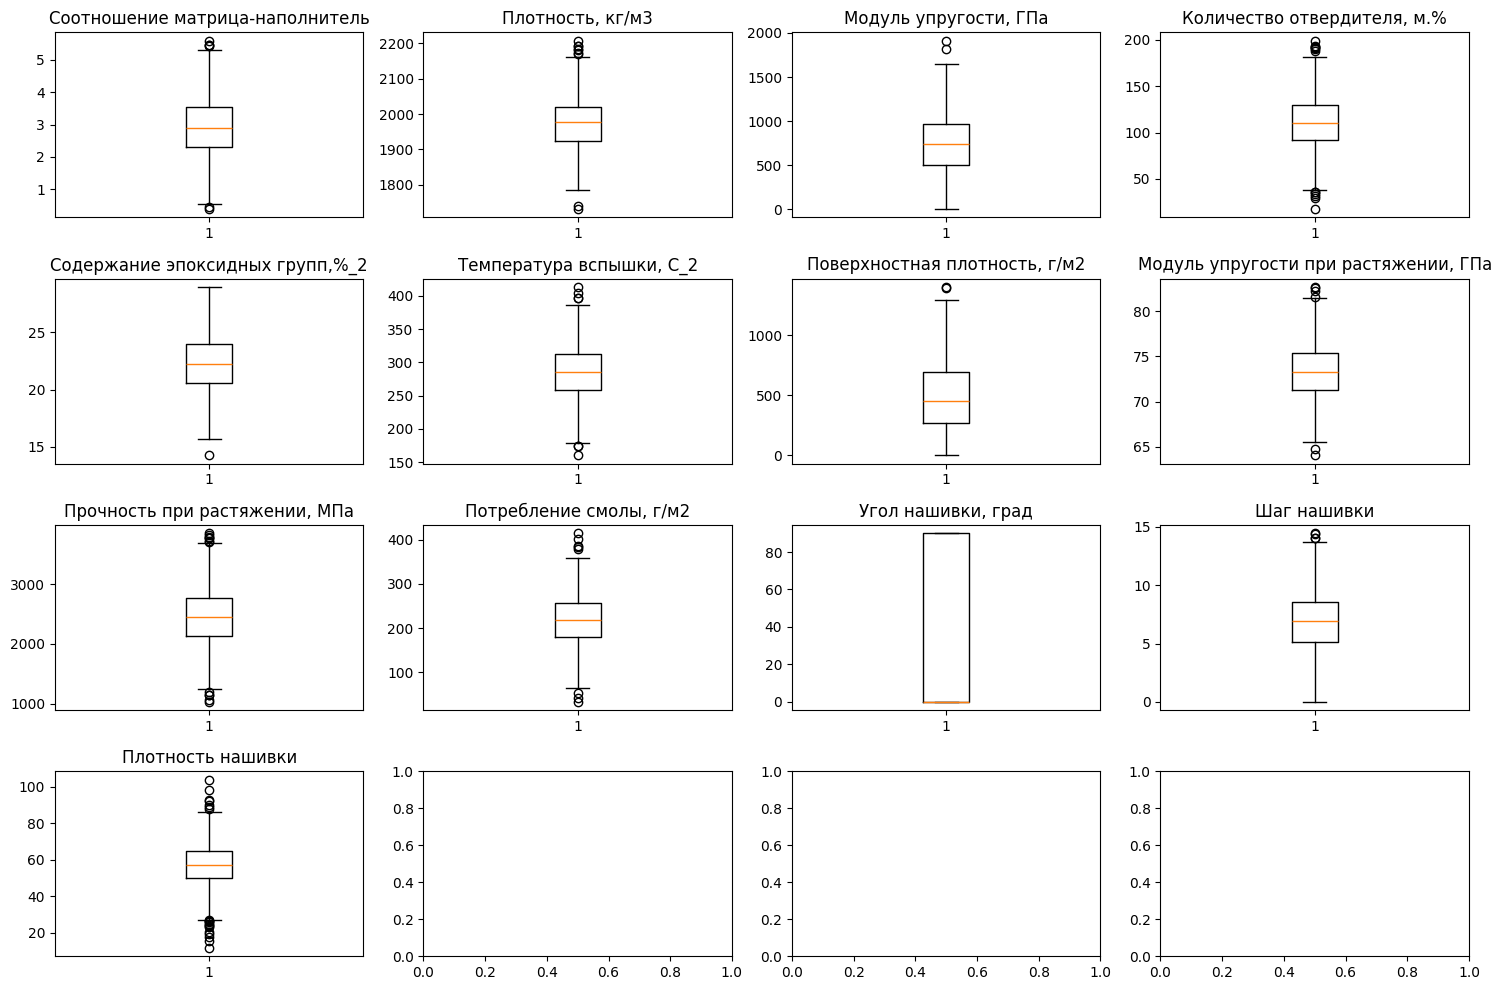

In [20]:
#построим boxplot's, продолжаем выявлять выбросы
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

# Построение boxplot для каждого числового признака
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


<ipython-input-21-92b1fb9efffc>:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



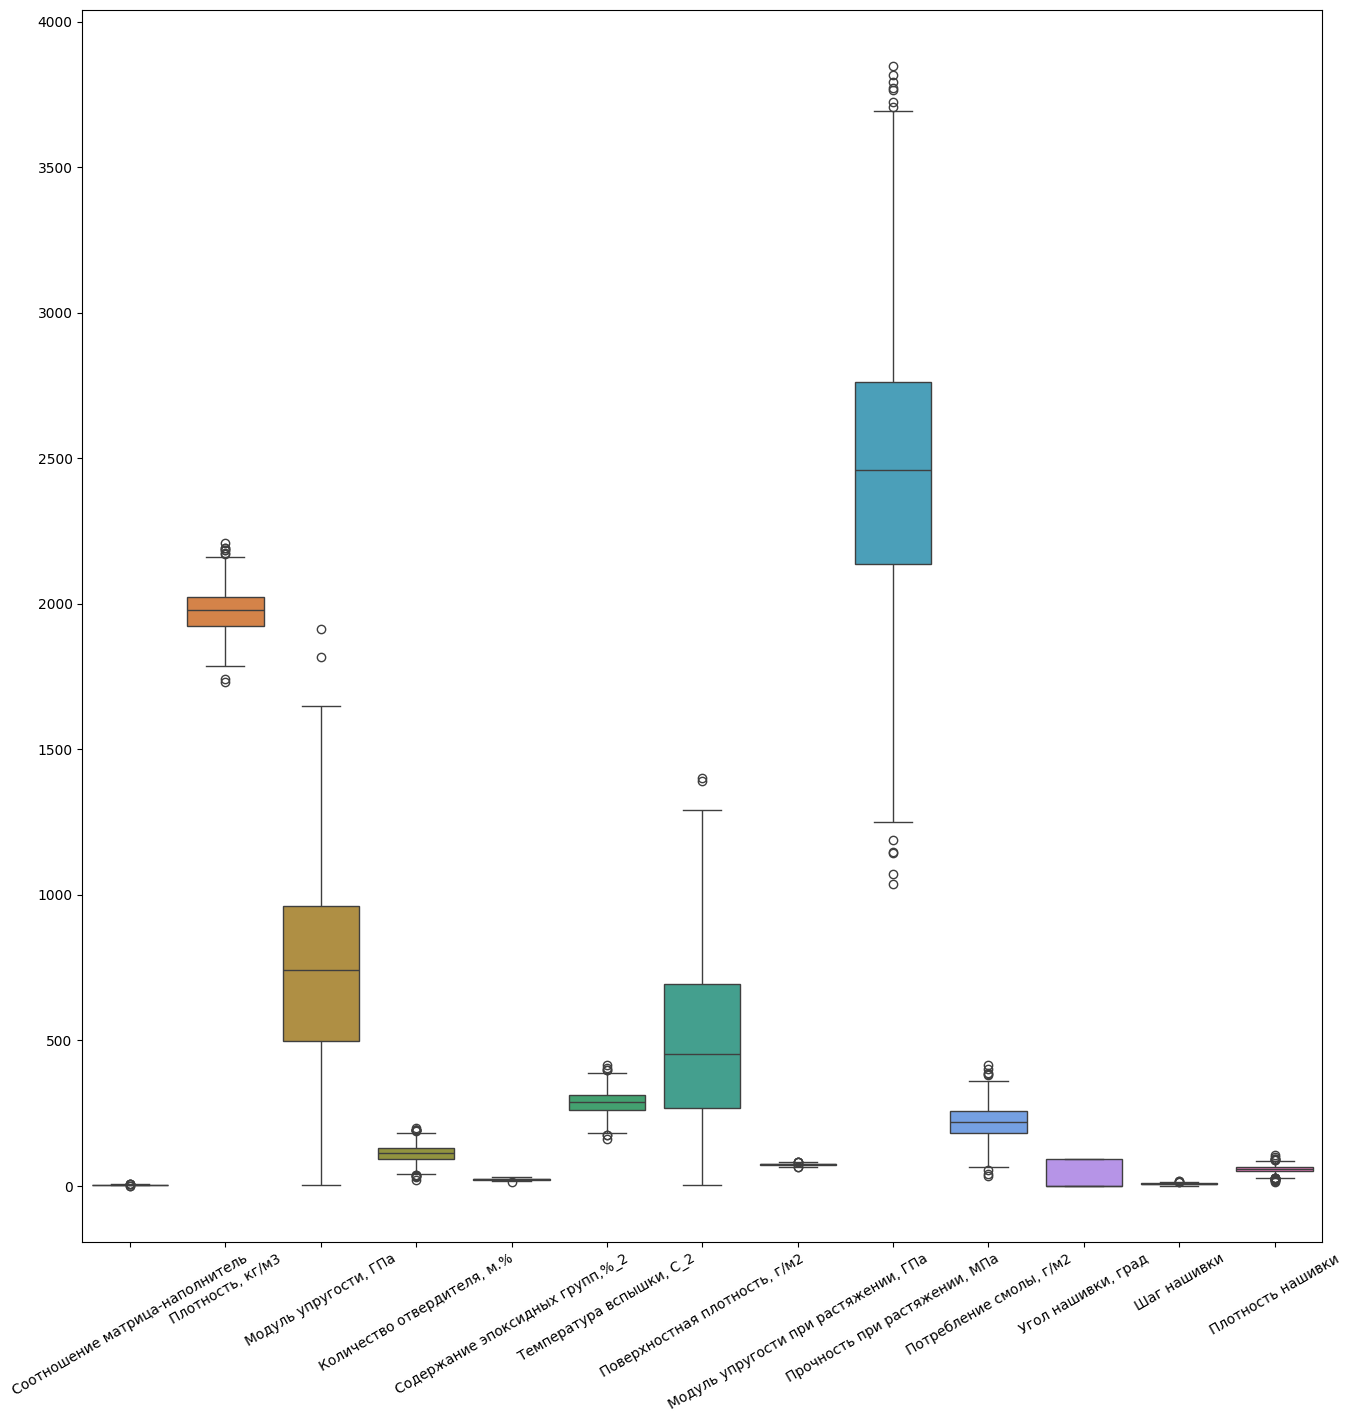

In [21]:
#посмотрим на выбросы в контексте одного графика
plt.figure(figsize = (16, 16))
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

* используем еще один метод по выявлению выбросов, а именно **метод 3х сигм**, который как раз актуален при нормальном распределении
* отобразив их вместе

Соотношение матрица-наполнитель: Выбросы метода 3-х сигм = 0, выбросы метода межквартильных диапазонов = 6


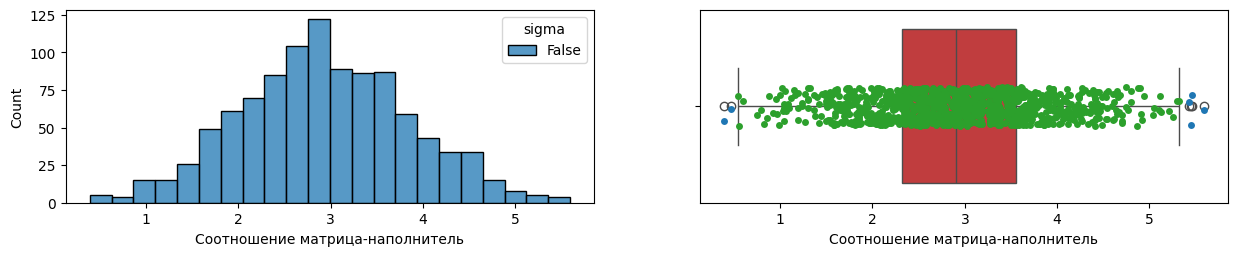

Плотность, кг/м3: Выбросы метода 3-х сигм = 3, выбросы метода межквартильных диапазонов = 9


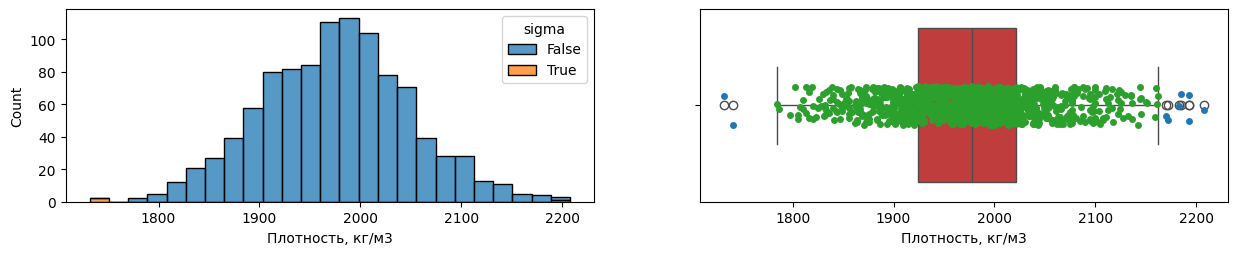

Модуль упругости, ГПа: Выбросы метода 3-х сигм = 2, выбросы метода межквартильных диапазонов = 2


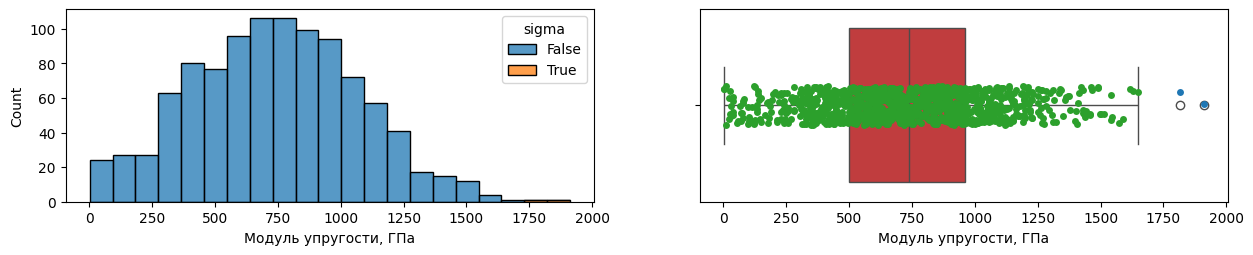

Количество отвердителя, м.%: Выбросы метода 3-х сигм = 2, выбросы метода межквартильных диапазонов = 13


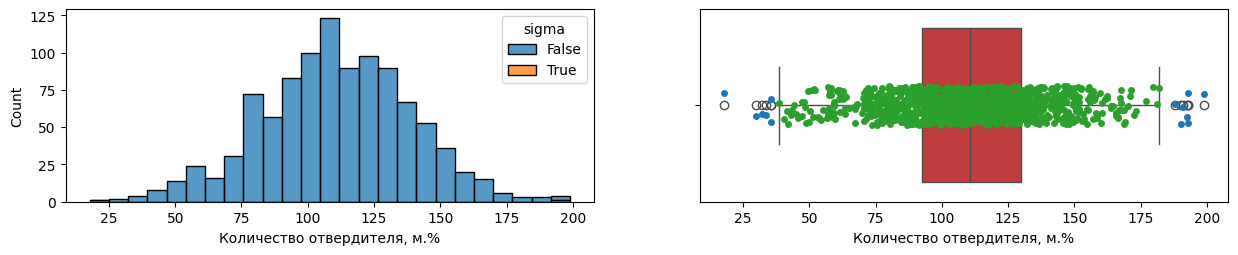

Содержание эпоксидных групп,%_2: Выбросы метода 3-х сигм = 1, выбросы метода межквартильных диапазонов = 1


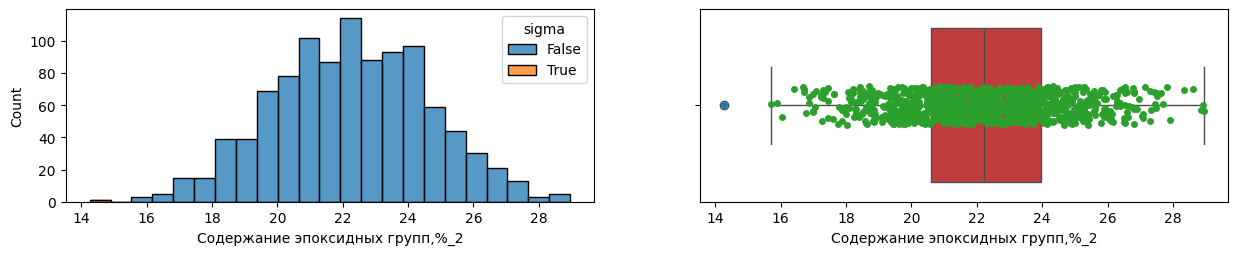

Температура вспышки, С_2: Выбросы метода 3-х сигм = 2, выбросы метода межквартильных диапазонов = 7


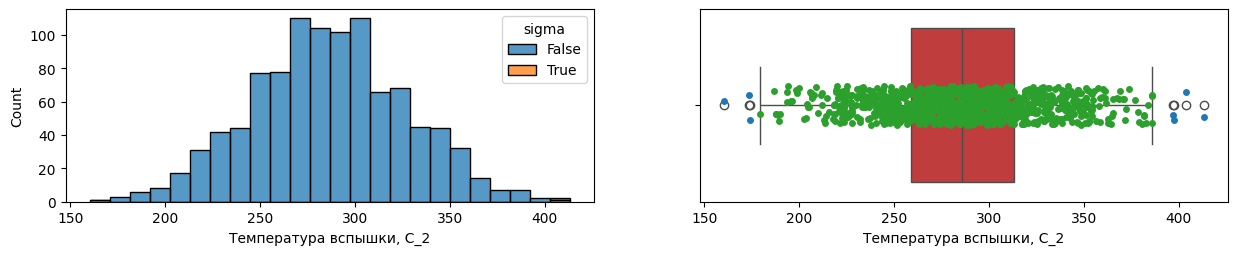

Поверхностная плотность, г/м2: Выбросы метода 3-х сигм = 2, выбросы метода межквартильных диапазонов = 2


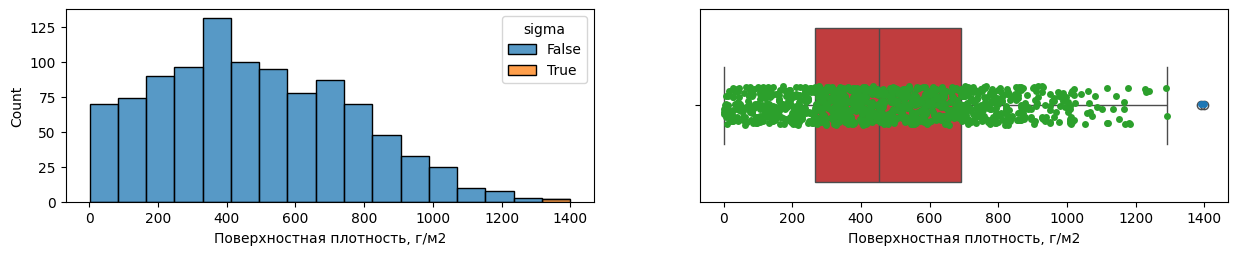

Модуль упругости при растяжении, ГПа: Выбросы метода 3-х сигм = 1, выбросы метода межквартильных диапазонов = 6


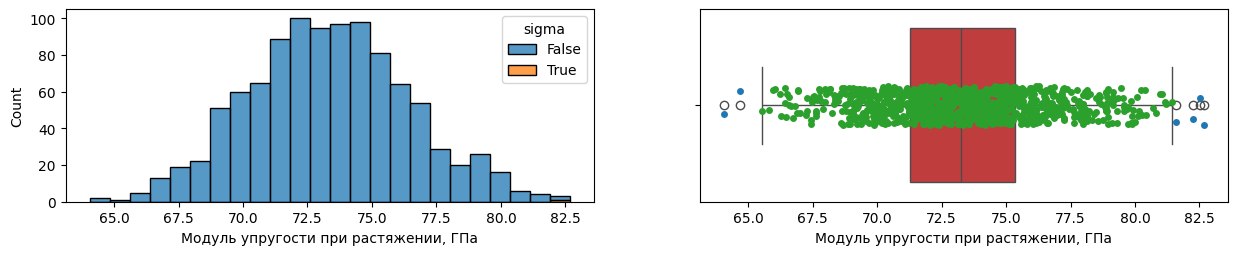

Прочность при растяжении, МПа: Выбросы метода 3-х сигм = 0, выбросы метода межквартильных диапазонов = 12


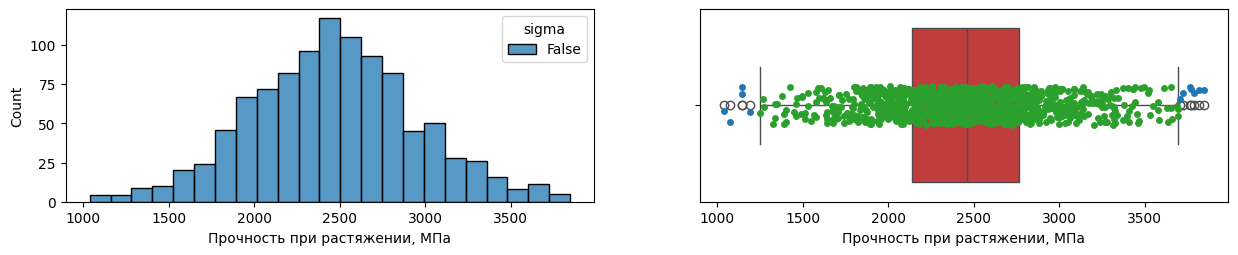

Потребление смолы, г/м2: Выбросы метода 3-х сигм = 3, выбросы метода межквартильных диапазонов = 8


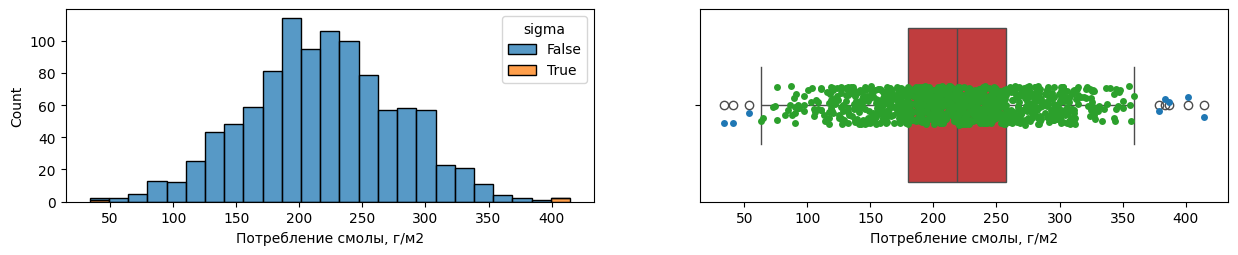

Угол нашивки, град: Выбросы метода 3-х сигм = 0, выбросы метода межквартильных диапазонов = 0


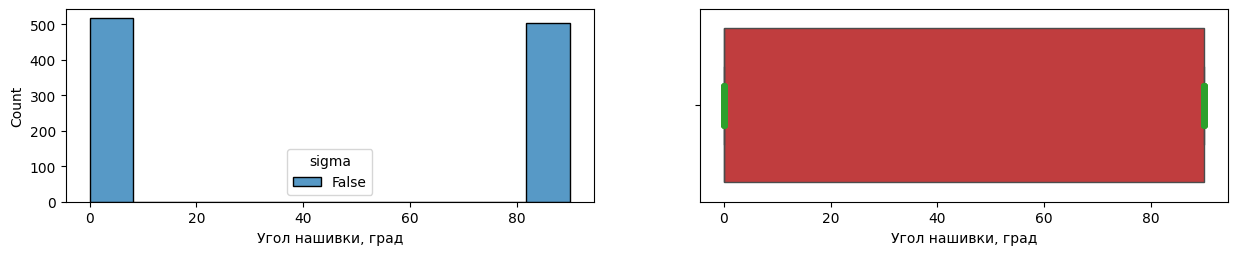

Шаг нашивки: Выбросы метода 3-х сигм = 0, выбросы метода межквартильных диапазонов = 4


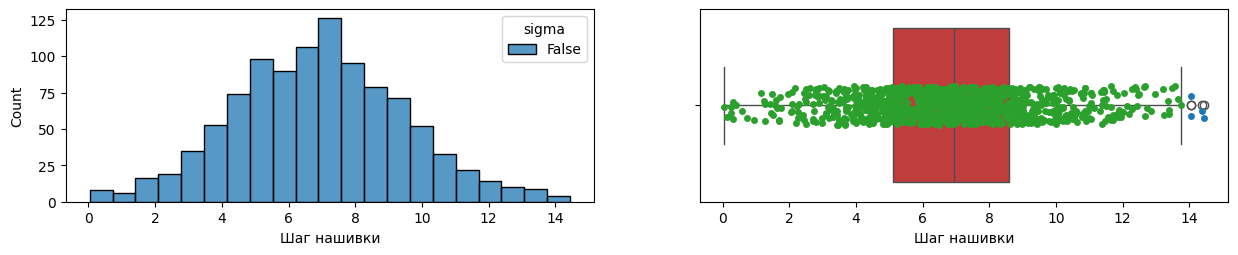

Плотность нашивки: Выбросы метода 3-х сигм = 6, выбросы метода межквартильных диапазонов = 20


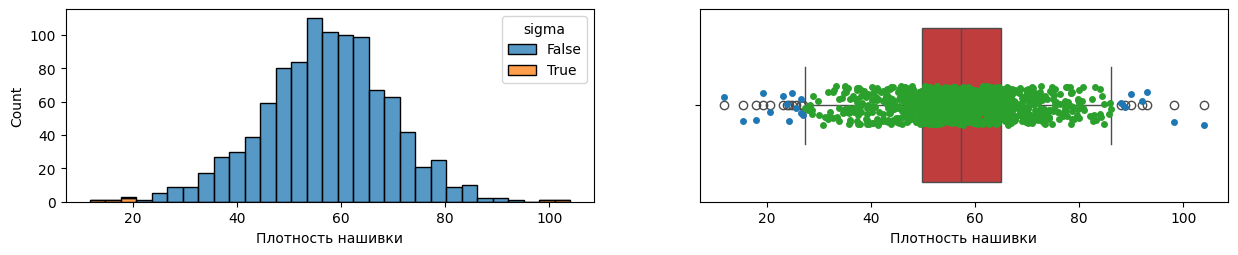

Методом 3-х сигм было найдено всего: 22 выбросов
Методом межквартильных диапазонов было найдено всего: 90 выбросов


In [22]:
metod_1 = 0
metod_2 = 0
for i in df:
    d = df.loc[:, [i]]

    zscore = (df[i] - df[i].mean()) / df[i].std()  # 3 сигм
    d['sigma'] = zscore.abs() > 3
    metod_1 += d['sigma'].sum()

    a1 = np.quantile(df[i], 0.25)  # межквартильных диапазонов
    a3 = np.quantile(df[i], 0.75)
    b = a3 - a1
    c = a1 - 1.5 * b
    w = a3 + 1.5 * b
    d['quantil'] = (df[i] <= c) | (df[i] >= w)
    metod_2 += d['quantil'].sum()

    print('{}: Выбросы метода 3-х сигм = {}, выбросы метода межквартильных диапазонов = {}'.format(i, d['sigma'].sum(), d['quantil'].sum())) # визуализация выбросов
    fig, axes = plt.subplots(1, 2, figsize = (15, 2.5))
    sns.histplot(data = d, x = i, hue = 'sigma', multiple ='stack', legend = True, ax = axes[0])
    sns.boxplot(data = d, x = i, color = 'tab:red', ax = axes[1])
    sns.stripplot(data = d[d['quantil'] == False], x = i, color = 'tab:green',ax = axes[1])
    sns.stripplot(data = d[d['quantil'] == True], x = i, color = 'tab:blue', ax = axes[1])
    plt.show()
print('Методом 3-х сигм было найдено всего:', metod_1, 'выбросов')
print('Методом межквартильных диапазонов было найдено всего:', metod_2, 'выбросов')

* Выбросы точно есть, построим графики для **Z-оценки**
* графики строим для выбросов, которые обнаружили с помощью метода 3х сигм

In [23]:
def grafik(x, title = '', xlabel = ''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Всего')
    plt.hist(x, bins = 30, color = "0.8", ec = "c", lw = 3)

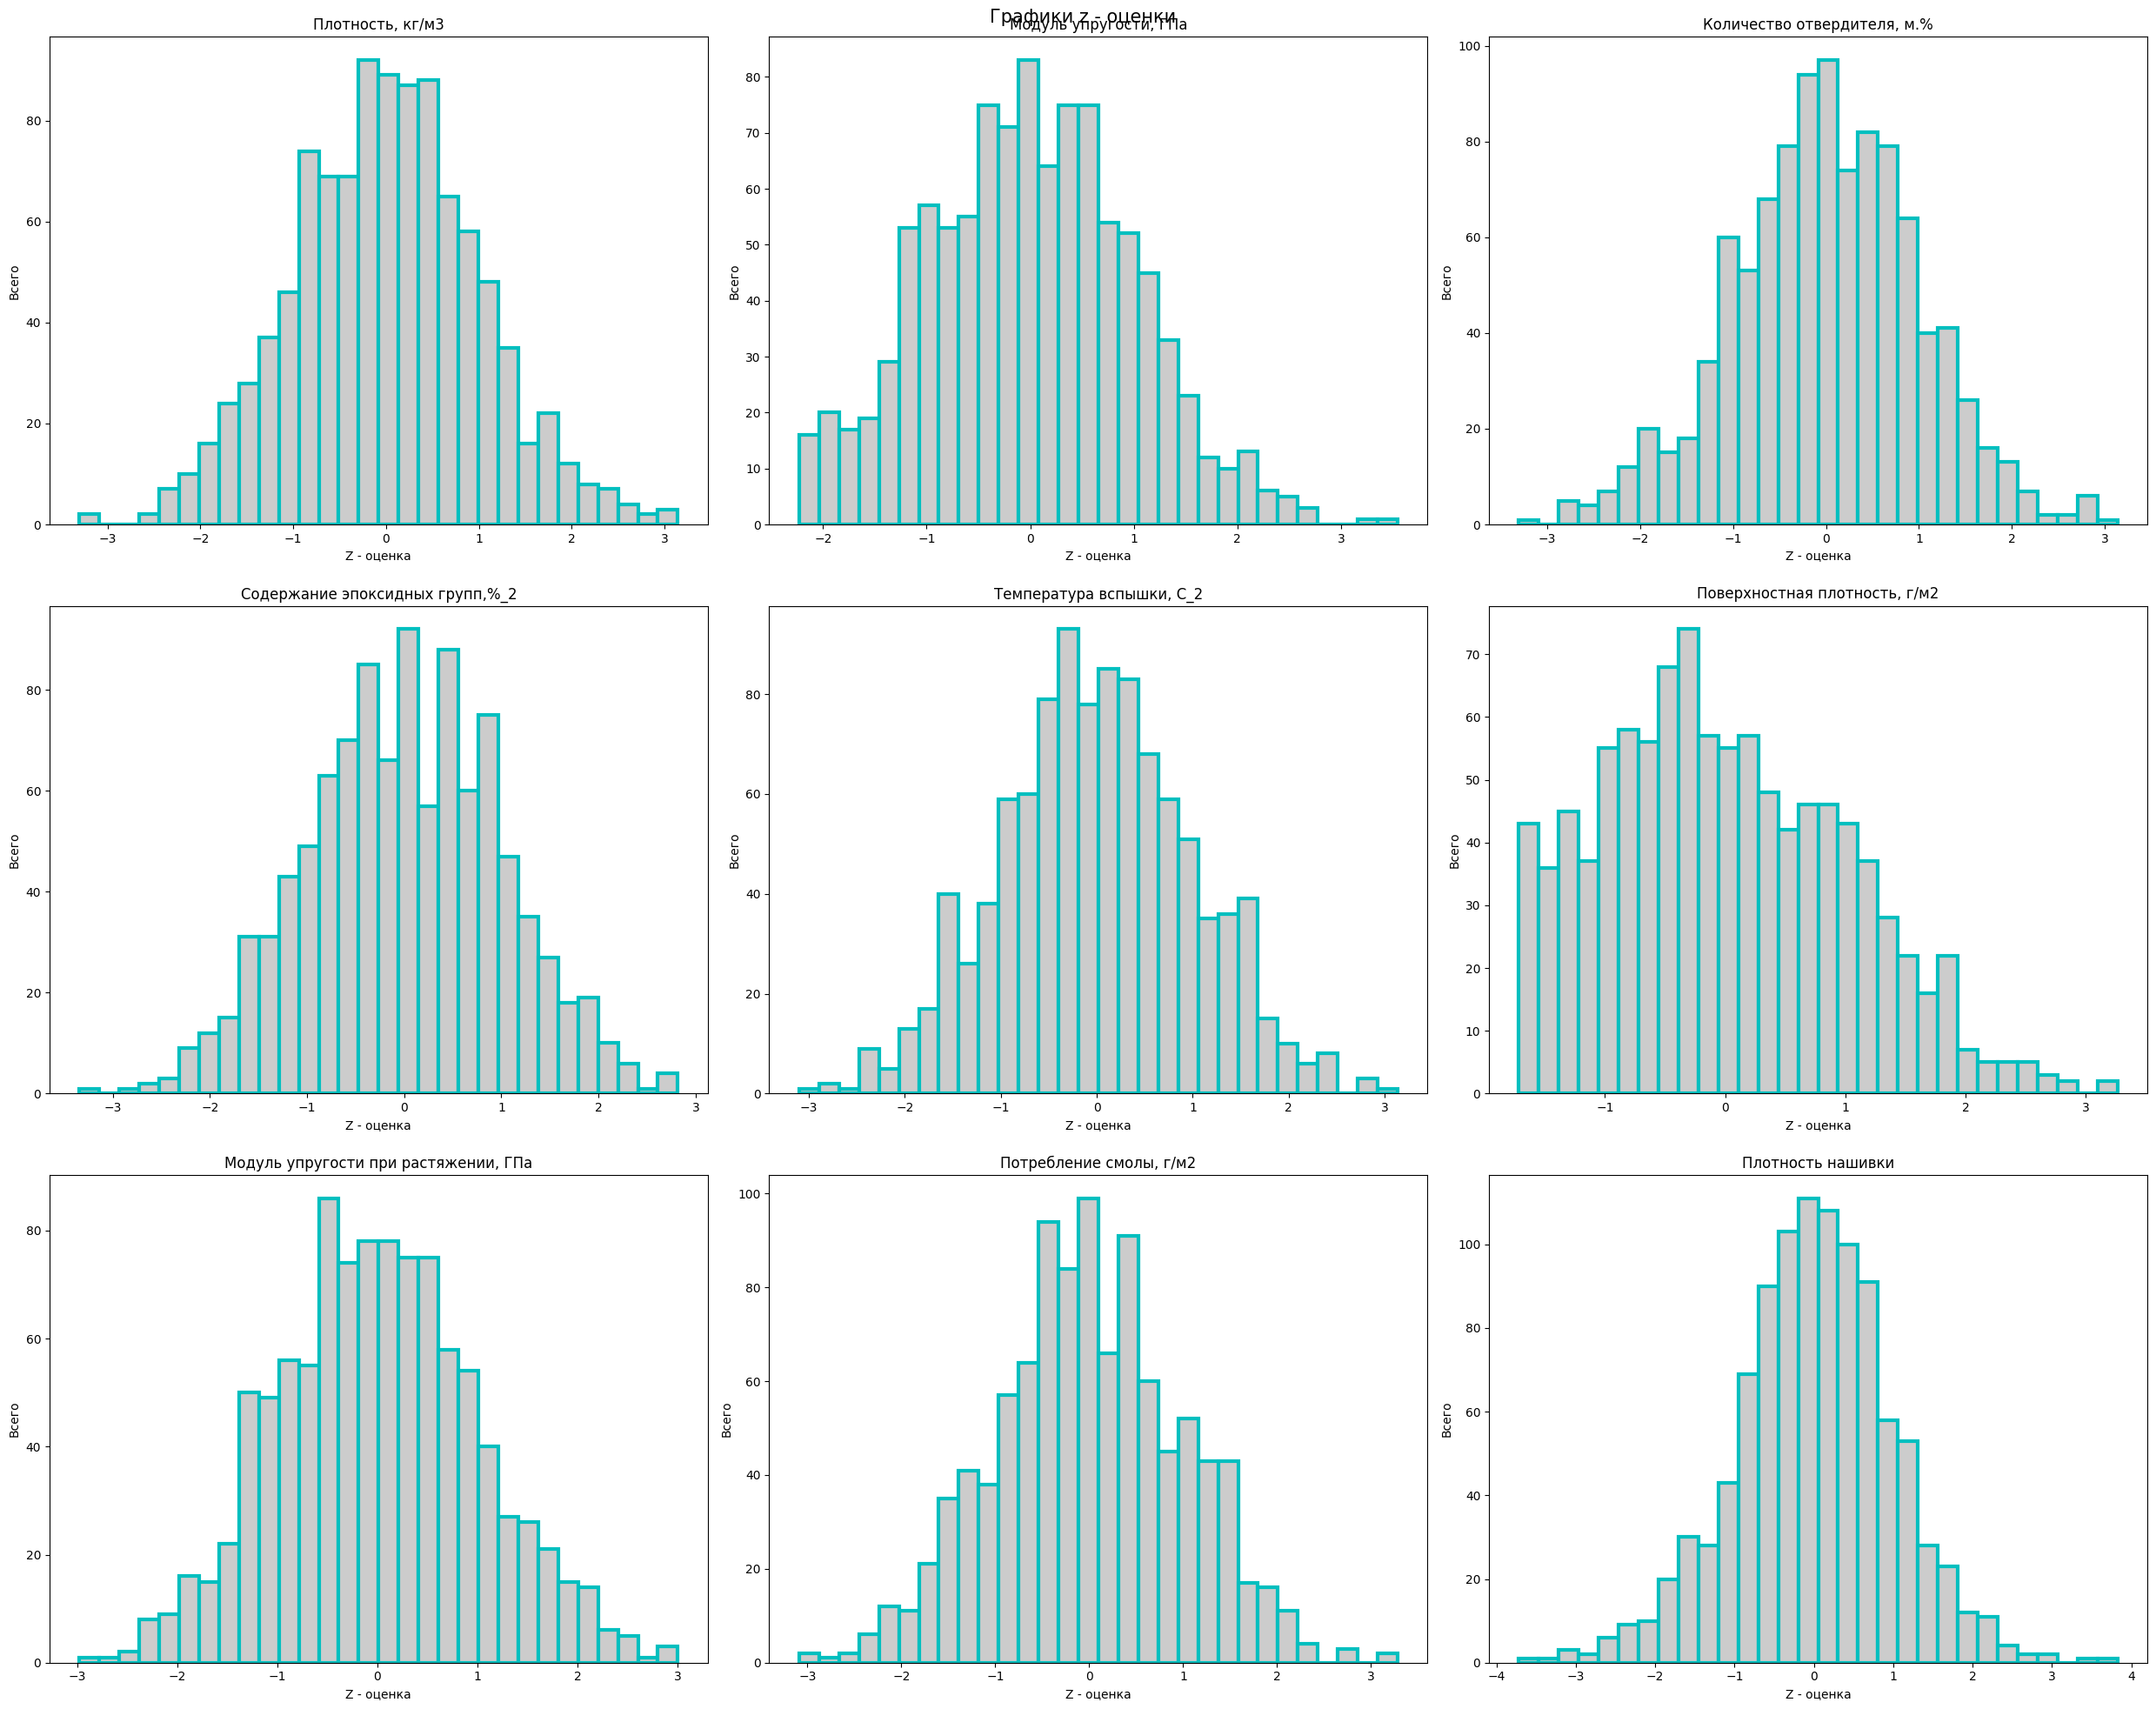

In [24]:
kolonki = ['Плотность, кг/м3', 'Модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
           'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
           'Потребление смолы, г/м2', 'Плотность нашивки' ]
plt.figure(figsize = (25, 20))
plt.suptitle('Графики z - оценки', size = 15)
plt.subplots_adjust(top = 0.85)
for i, k in enumerate(kolonki):
    z_value = (df[k] - df[k].mean()) / df[k].std()
    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout(h_pad = 2)
    grafik(z_value, title = k, xlabel = "Z - оценка")

* удалим выбросы, основываясь на Z-оценке

In [25]:
#посчитаем z метрики для наших признаков и занесем их в датасет z_scores
z_scores = (df[kolonki] - df[kolonki].mean()) / df[kolonki].std()
#удалим признаки выходящие за интервал
df = df[(np.abs(z_scores) <= 3).all(axis=1)]

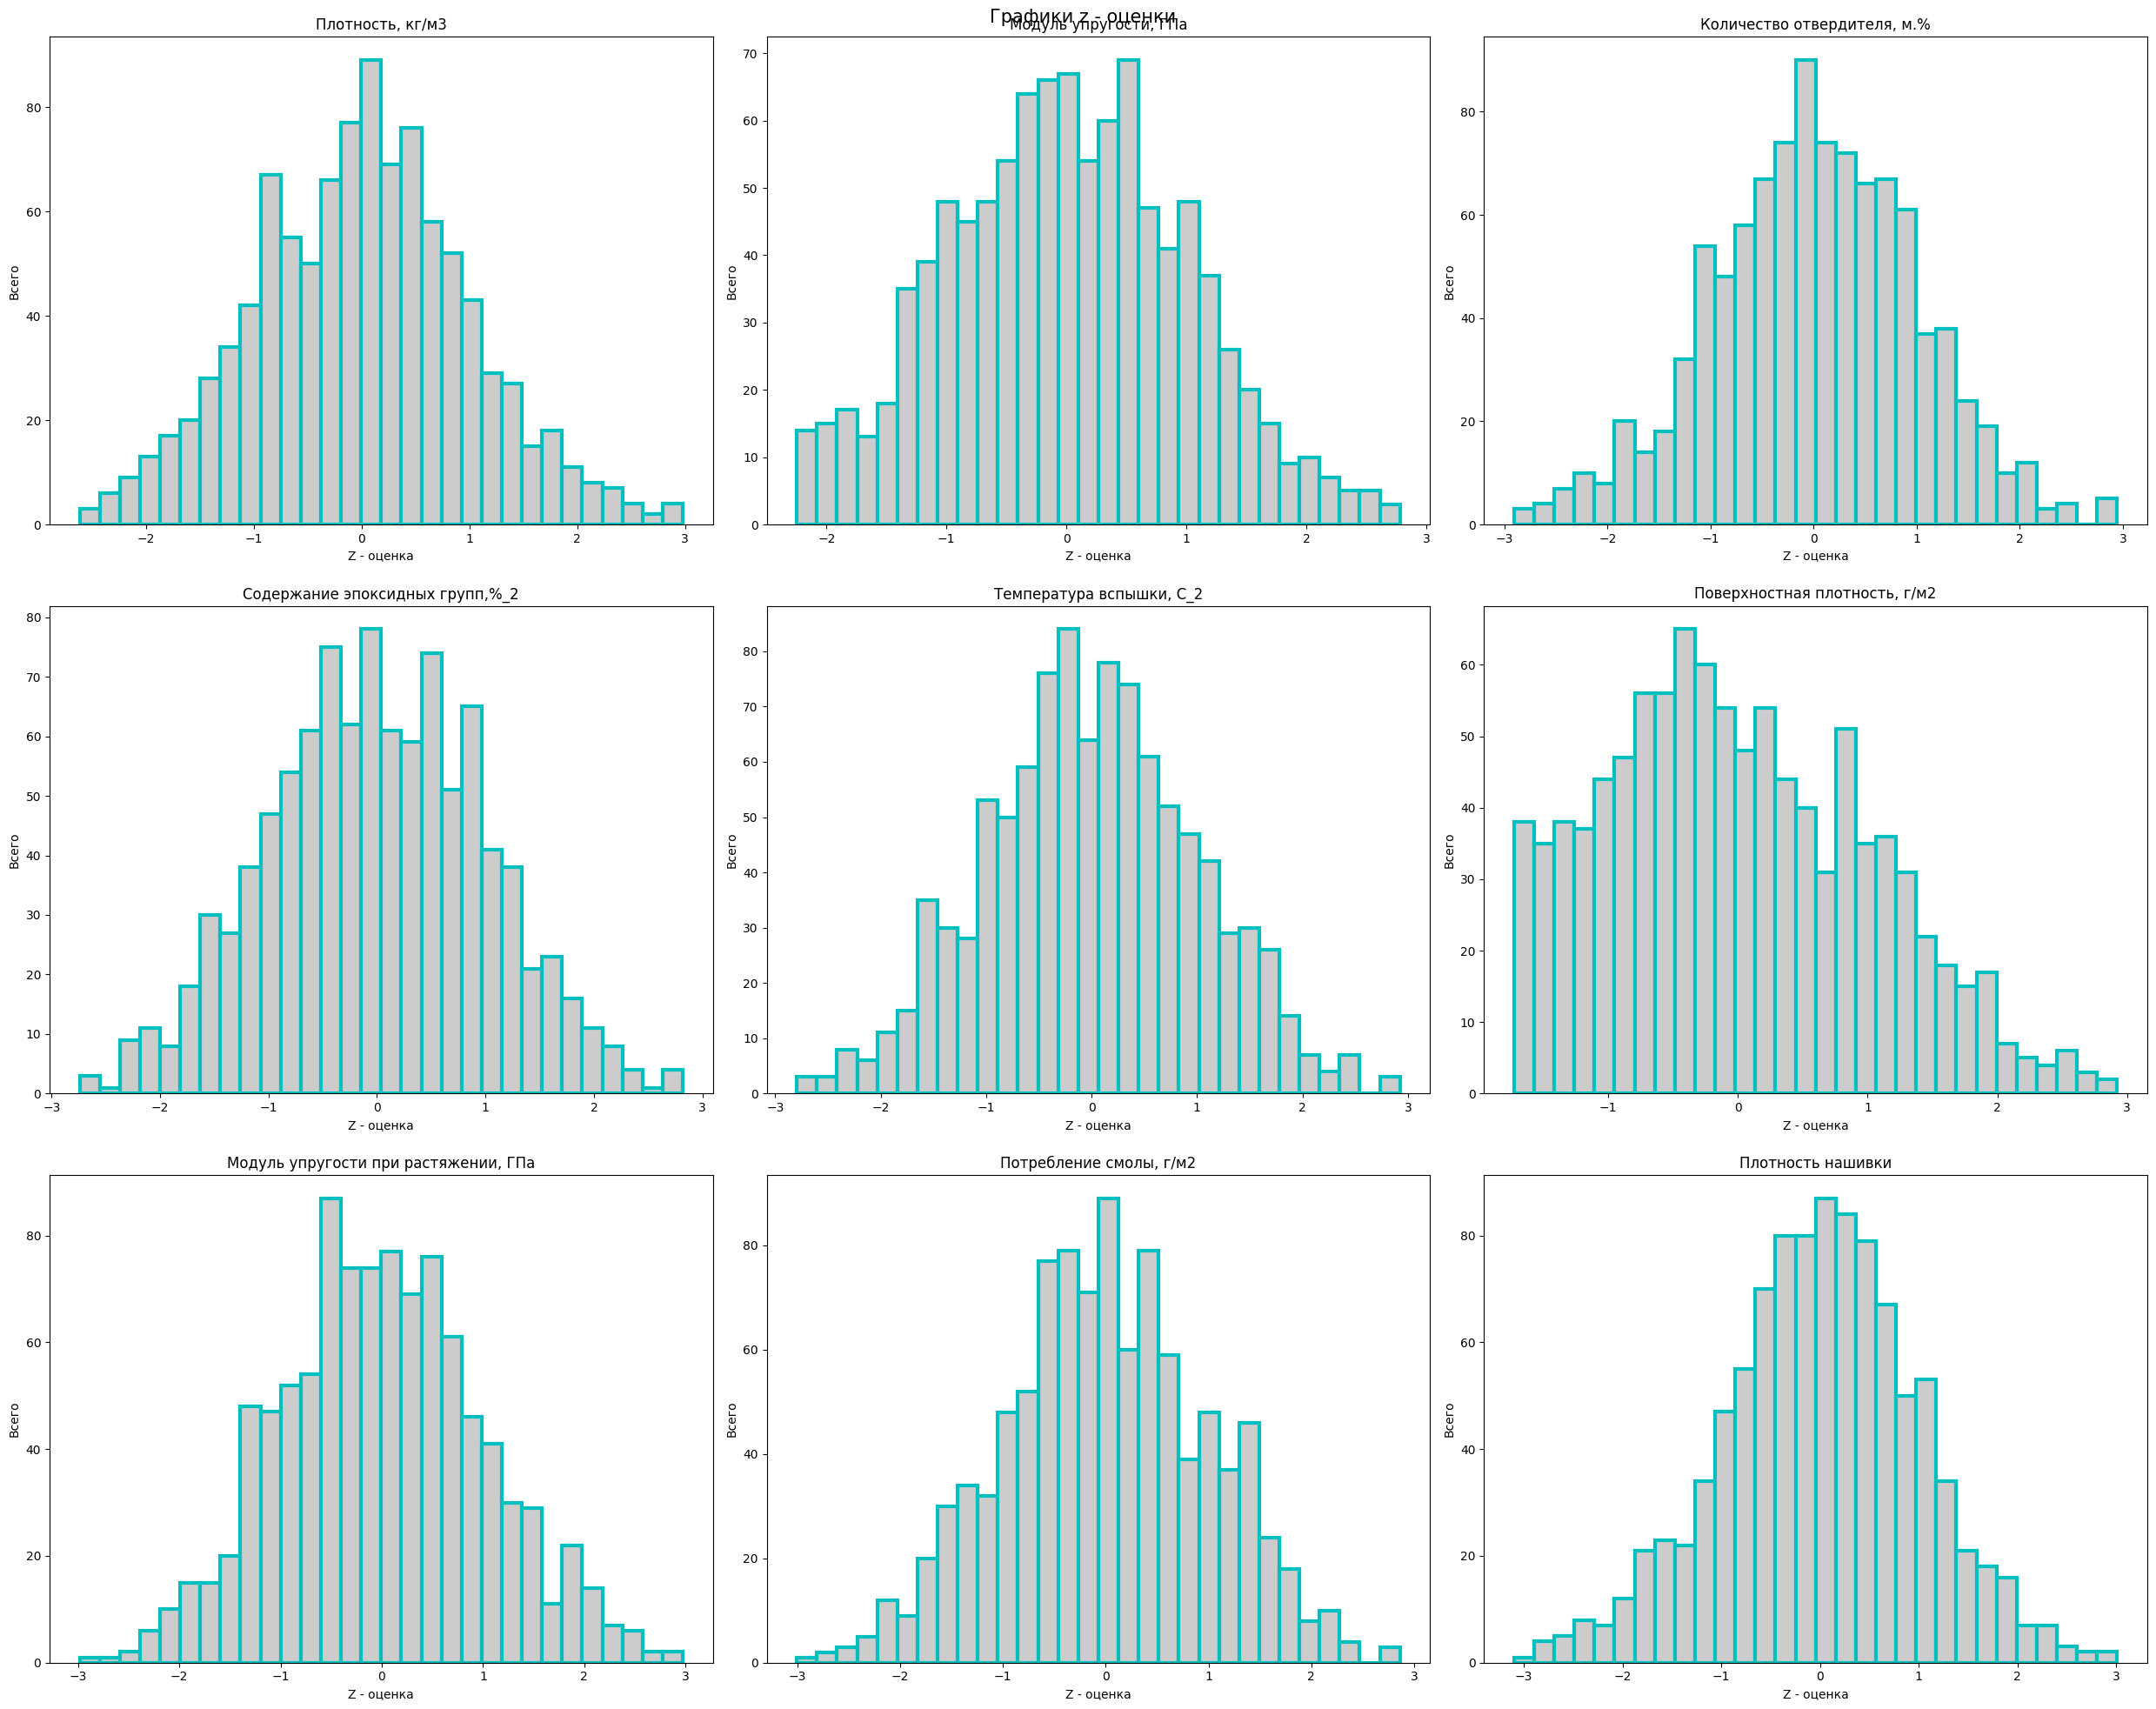

In [26]:
#смотрим что получилось
plt.figure(figsize = (25, 20))
plt.suptitle('Графики z - оценки', size = 15)
plt.subplots_adjust(top = 0.85)
for i, k in enumerate(kolonki):
    z_value = (df[k] - df[k].mean()) / df[k].std()
    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout(h_pad = 2)
    grafik(z_value, title = k, xlabel = "Z - оценка")

In [27]:
df.info()
print('Датасет уменьшился на',((1023-996)/1023)*100,'%')

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   Модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Угол нашивки, град                    999 non-null    int64  
 11  Шаг нашивки            

* после удаления выбросов наш датасет уменьшился всего на 2,6%, как я считаю допустимо

##**X,y + TrainTest**

In [28]:

# Определяем целевые переменные
target_columns = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
X = df.drop(columns=target_columns)
y = df[target_columns]

#для нейронной сети
target_columns_nn = ['Соотношение матрица-наполнитель']
X_nn = df.drop(columns=target_columns_nn)
y_nn = df[target_columns_nn]

# Разделение данных на обучающую и тестовую выборки для X, y1 и y2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Разделяем y_train и y_test на y1 и y2
y_train1 = y_train['Модуль упругости при растяжении, ГПа']
y_test1 = y_test['Модуль упругости при растяжении, ГПа']
y_train2 = y_train['Прочность при растяжении, МПа']
y_test2 = y_test['Прочность при растяжении, МПа']

# Создание и применение StandardScaler и MinMaxScaler
scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler()}
X_train_scaled = {}
X_test_scaled = {}

for scaler_name, scaler in scalers.items():
    X_train_scaled[scaler_name] = scaler.fit_transform(X_train)
    X_test_scaled[scaler_name] = scaler.transform(X_test)


##**Линейная регрессия**

In [29]:
# Функция для обучения, оценки и сохранения модели в словаре
def evaluate_and_store_model(model, X_train, X_test, y_train, y_test, model_name, target_name, model_storage):
    # Обучаем модель
    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Создаем уникальное название для модели
    model_key = f'{model_name}_{target_name}'

    # Сохраняем обученную модель в словаре
    model_storage[model_key] = model  # Сохраняем саму модель

    # Возвращаем метрики
    return {
        'Model': model_key,
        'Model_Class': model.__class__.__name__,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Словарь для хранения обученных моделей
trained_models = {}

# Список для хранения результатов метрик
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Линейная регрессия без масштабирования
    results.append(evaluate_and_store_model(LinearRegression(), X_train, X_test, y_train, y_test, 'LR_default', target_name, trained_models))

    # Линейная регрессия с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_and_store_model(LinearRegression(), X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'LR_{scaler_name}', target_name, trained_models))

# Вывод результатов в DataFrame
metrics_df_LR = pd.DataFrame(results)
metrics_df_LR.head(6)


,Model,Model_Class,MSE,MAE,R^2
0,LR_default_y1,LinearRegression,9.760235,2.568891,-0.018326
1,LR_StandardScaler_y1,LinearRegression,9.760235,2.568891,-0.018326
2,LR_MinMaxScaler_y1,LinearRegression,9.760235,2.568891,-0.018326
3,LR_default_y2,LinearRegression,207163.709666,366.389264,-0.011239
4,LR_StandardScaler_y2,LinearRegression,207163.709666,366.389264,-0.011239
5,LR_MinMaxScaler_y2,LinearRegression,207163.709666,366.389264,-0.011239


In [30]:
trained_models

{'LR_default_y1': LinearRegression(),
 'LR_StandardScaler_y1': LinearRegression(),
 'LR_MinMaxScaler_y1': LinearRegression(),
 'LR_default_y2': LinearRegression(),
 'LR_StandardScaler_y2': LinearRegression(),
 'LR_MinMaxScaler_y2': LinearRegression()}

* В нашей функции все 6 моделей были записаны в словарь **trained_models**, в колонке **Model_name** находятся ключи для вызова моделей, внизу показан пример вызова из словаря
* Аналогично и для других моделей вызов тот же

In [31]:
# Название нужной модели
model_key = "LR_StandardScaler_y1"

# Проверяем, что модель существует в словаре
if model_key in trained_models:
    #получаем модель(вызываем из словаря)
    LR_StandardScaler_y1 = trained_models[model_key]


##**Деревья решений**

In [32]:
DT = DecisionTreeRegressor(random_state = 14)
dt_params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse'],
    'splitter': ['best']
}
GSCV_DT = GridSearchCV(DT, dt_params , n_jobs =- 1, cv = 10)

In [33]:
# Функция для обучения, оценки и сохранения модели в словаре
def evaluate_and_store_model(model, X_train, X_test, y_train, y_test, model_name, target_name, model_storage):
    # Обучаем модель
    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Создаем уникальное название для модели
    model_key = f'{model_name}_{target_name}'

    # Сохраняем обученную модель в словаре
    model_storage[model_key] = model  # Сохраняем саму модель

    # Возвращаем метрики
    return {
        'Model': model_key,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Словарь для хранения обученных моделей
trained_models = {}

# Список для хранения результатов метрик
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Метод опорных векторов (SVR) без масштабирования
    results.append(evaluate_and_store_model(GSCV_DT, X_train, X_test, y_train, y_test, 'DT_default', target_name, trained_models))

    # Метод опорных векторов (SVR) с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_and_store_model(GSCV_DT, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'DT_{scaler_name}', target_name, trained_models))

# Вывод результатов в DataFrame
metrics_df_DT = pd.DataFrame(results)
metrics_df_DT.head(6)


,Model,MSE,MAE,R^2
0,DT_default_y1,10.192351,2.610698,-0.063411
1,DT_StandardScaler_y1,10.192351,2.610698,-0.063411
2,DT_MinMaxScaler_y1,10.192351,2.610698,-0.063411
3,DT_default_y2,246991.747803,397.833746,-0.205653
4,DT_StandardScaler_y2,246991.747803,397.833746,-0.205653
5,DT_MinMaxScaler_y2,246991.747803,397.833746,-0.205653


In [34]:
# Создание модели с лучшими параметрами
best_params_DT = GSCV_DT.best_params_
optimized_DT = DecisionTreeRegressor(random_state=14, **best_params_DT)

# Функция для обучения и оценки модели на каждой целевой переменной
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Model': f'{model_name}_{target_name}',
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Список для хранения результатов
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Случайный лес без масштабирования
    results.append(evaluate_model(optimized_DT, X_train, X_test, y_train, y_test, 'DT_default', target_name))

    # Случайный лес с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_model(optimized_DT, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'DT_{scaler_name}', target_name))

# Вывод результатов в DataFrame
BEST_DT = pd.DataFrame(results)
BEST_DT.head(6)


,Model,MSE,MAE,R^2
0,DT_default_y1,10.170373,2.608220,-0.061117
1,DT_StandardScaler_y1,10.170373,2.608220,-0.061117
2,DT_MinMaxScaler_y1,10.170373,2.608220,-0.061117
3,DT_default_y2,246991.747803,397.833746,-0.205653
4,DT_StandardScaler_y2,246991.747803,397.833746,-0.205653
5,DT_MinMaxScaler_y2,246991.747803,397.833746,-0.205653


In [35]:
optimized_DT

DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                      random_state=14)

Как видно из дерева решений

Подбор лучших гиперпараметров, ситуацию это лучше не делает для остальных методов обучения, гиперпараметры подбирать не будем тк это занимает много времени

##**Случайный лес**

In [36]:
rf = RandomForestRegressor(random_state = 14)

In [37]:

# Функция для обучения, оценки и сохранения модели в словаре
def evaluate_and_store_model(model, X_train, X_test, y_train, y_test, model_name, target_name, model_storage):
    # Обучаем модель
    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Создаем уникальное название для модели
    model_key = f'{model_name}_{target_name}'

    # Сохраняем обученную модель в словаре
    model_storage[model_key] = model  # Сохраняем саму модель

    # Возвращаем метрики
    return {
        'Model': model_key,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Список для хранения результатов метрик
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Случайный лес (Random Forest) без масштабирования
    results.append(evaluate_and_store_model(rf, X_train, X_test, y_train, y_test, 'RF_default', target_name, trained_models))

    # Случайный лес (Random Forest) с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_and_store_model(rf, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'RF_{scaler_name}', target_name, trained_models))

# Вывод результатов в DataFrame
metrics_df_RF = pd.DataFrame(results)
metrics_df_RF.head(6)


,Model,MSE,MAE,R^2
0,RF_default_y1,9.928323,2.615923,-0.035863
1,RF_StandardScaler_y1,9.928323,2.615923,-0.035863
2,RF_MinMaxScaler_y1,9.928323,2.615923,-0.035863
3,RF_default_y2,219545.747318,382.537923,-0.071680
4,RF_StandardScaler_y2,219545.747318,382.537923,-0.071680
5,RF_MinMaxScaler_y2,219545.747318,382.537923,-0.071680


In [38]:
trained_models

{'DT_default_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_StandardScaler_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_MinMaxScaler_y1': GridSearchCV(cv=10, estimator=DecisionTr

##**K-ближайших соседей**

In [39]:
kn = KNeighborsRegressor()

In [40]:
# Функция для обучения, оценки и сохранения модели в словаре
def evaluate_and_store_model(model, X_train, X_test, y_train, y_test, model_name, target_name, model_storage):
    # Обучаем модель
    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Создаем уникальное название для модели
    model_key = f'{model_name}_{target_name}'

    # Сохраняем обученную модель в словаре
    model_storage[model_key] = model  # Сохраняем саму модель

    # Возвращаем метрики
    return {
        'Model': model_key,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }


# Список для хранения результатов метрик
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Случайный лес (Random Forest) без масштабирования
    results.append(evaluate_and_store_model(rf, X_train, X_test, y_train, y_test, 'RF_default', target_name, trained_models))

    # Случайный лес (Random Forest) с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_and_store_model(rf, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'RF_{scaler_name}', target_name, trained_models))

# Вывод результатов в DataFrame
metrics_df_RF = pd.DataFrame(results)
metrics_df_RF.head(6)


,Model,MSE,MAE,R^2
0,RF_default_y1,9.928323,2.615923,-0.035863
1,RF_StandardScaler_y1,9.928323,2.615923,-0.035863
2,RF_MinMaxScaler_y1,9.928323,2.615923,-0.035863
3,RF_default_y2,219545.747318,382.537923,-0.071680
4,RF_StandardScaler_y2,219545.747318,382.537923,-0.071680
5,RF_MinMaxScaler_y2,219545.747318,382.537923,-0.071680


In [41]:
trained_models

{'DT_default_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_StandardScaler_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_MinMaxScaler_y1': GridSearchCV(cv=10, estimator=DecisionTr

##**Градиентный бустинг**

In [42]:
gbr = GradientBoostingRegressor(random_state=14)


In [43]:
# Функция для обучения, оценки и сохранения модели в словаре
def evaluate_and_store_model(model, X_train, X_test, y_train, y_test, model_name, target_name, model_storage):
    # Обучаем модель
    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Создаем уникальное название для модели
    model_key = f'{model_name}_{target_name}'

    # Сохраняем обученную модель в словаре
    model_storage[model_key] = model  # Сохраняем саму модель

    # Возвращаем метрики
    return {
        'Model': model_key,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Список для хранения результатов метрик
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Gradient Boosting (GB) без масштабирования
    results.append(evaluate_and_store_model(gbr, X_train, X_test, y_train, y_test, 'GB_default', target_name, trained_models))

    # Gradient Boosting (GB) с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_and_store_model(gbr, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'GB_{scaler_name}', target_name, trained_models))

# Вывод результатов в DataFrame
metrics_df_GB = pd.DataFrame(results)
metrics_df_GB.head(6)


,Model,MSE,MAE,R^2
0,GB_default_y1,10.199502,2.640701,-0.064157
1,GB_StandardScaler_y1,10.199502,2.640701,-0.064157
2,GB_MinMaxScaler_y1,10.199502,2.640701,-0.064157
3,GB_default_y2,223296.254685,372.724754,-0.089987
4,GB_StandardScaler_y2,223296.254685,372.724754,-0.089987
5,GB_MinMaxScaler_y2,223296.254685,372.724754,-0.089987


In [44]:
trained_models

{'DT_default_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_StandardScaler_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_MinMaxScaler_y1': GridSearchCV(cv=10, estimator=DecisionTr

##**Метод опорных векторов**

In [45]:
# Инициализация модели метода опорных векторов
svr = SVR()

In [46]:
# Функция для обучения, оценки и сохранения модели в словаре
def evaluate_and_store_model(model, X_train, X_test, y_train, y_test, model_name, target_name, model_storage):
    # Обучаем модель
    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Создаем уникальное название для модели
    model_key = f'{model_name}_{target_name}'

    # Сохраняем обученную модель в словаре
    model_storage[model_key] = model  # Сохраняем саму модель

    # Возвращаем метрики
    return {
        'Model': model_key,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }


# Список для хранения результатов метрик
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Случайный лес (SVR) без масштабирования
    results.append(evaluate_and_store_model(svr, X_train, X_test, y_train, y_test, 'SV_default', target_name, trained_models))

    # Случайный лес (SVR) с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_and_store_model(svr, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'SV_{scaler_name}', target_name, trained_models))

# Вывод результатов в DataFrame
metrics_df_SV = pd.DataFrame(results)
metrics_df_SV.head(6)


,Model,MSE,MAE,R^2
0,SV_default_y1,9.793017,2.556059,-0.021746
1,SV_StandardScaler_y1,10.456769,2.671790,-0.090998
2,SV_MinMaxScaler_y1,10.344377,2.667328,-0.079272
3,SV_default_y2,206047.224096,360.853607,-0.005789
4,SV_StandardScaler_y2,206030.987092,360.928958,-0.005709
5,SV_MinMaxScaler_y2,206190.453441,360.986672,-0.006488


In [47]:
trained_models

{'DT_default_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_StandardScaler_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_MinMaxScaler_y1': GridSearchCV(cv=10, estimator=DecisionTr

##**Многослойный перцептрон**

In [48]:
mlp = MLPRegressor(random_state = 14, verbose = False)
# Оптимизированные параметры для подбора гиперпараметров
mlp_params = {
    'hidden_layer_sizes': [(64,), (32,), (16,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter': [200],
    'learning_rate': ['constant']
}
GSCV_mlp = GridSearchCV(mlp, mlp_params, n_jobs =- 1, cv = 10)

In [49]:
# Функция для обучения и оценки модели на каждой целевой переменной
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Model': f'{model_name}_{target_name}',
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Список для хранения результатов
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # Случайный лес без масштабирования
    results.append(evaluate_model(GSCV_mlp, X_train, X_test, y_train, y_test, 'MLP_default', target_name))

    # Случайный лес с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_model(GSCV_mlp, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'MLP_{scaler_name}', target_name))

# Вывод результатов в DataFrame
metrics_df_MLP = pd.DataFrame(results)
metrics_df_MLP.head(6)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum

,Model,MSE,MAE,R^2
0,MLP_default_y1,2.494727e+01,4.094476,-1.602853
1,MLP_StandardScaler_y1,1.484995e+02,9.854574,-14.493576
2,MLP_MinMaxScaler_y1,8.432547e+01,7.403474,-7.798028
3,MLP_default_y2,2.150331e+05,364.364123,-0.049652
4,MLP_StandardScaler_y2,5.501842e+06,2301.354002,-25.856420
5,MLP_MinMaxScaler_y2,4.687641e+06,2117.268040,-21.882019


In [50]:
# Создание модели с лучшими параметрами
best_params_mlp = GSCV_mlp.best_params_
optimized_mlp = MLPRegressor(random_state=14, **best_params_mlp)

# Функция для обучения, оценки и сохранения модели в словаре
def evaluate_and_store_model(model, X_train, X_test, y_train, y_test, model_name, target_name, model_storage):
    # Обучаем модель
    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Создаем уникальное название для модели
    model_key = f'{model_name}_{target_name}'

    # Сохраняем обученную модель в словаре
    model_storage[model_key] = model  # Сохраняем саму модель

    # Возвращаем метрики
    return {
        'Model': model_key,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Список для хранения результатов метрик
results = []

# Обучение модели для y1 и y2 без масштабирования и с различными масштабированиями
for target_name, y_train, y_test in [('y1', y_train1, y_test1), ('y2', y_train2, y_test2)]:
    # MLPRegressor (MLP) без масштабирования
    results.append(evaluate_and_store_model(optimized_mlp, X_train, X_test, y_train, y_test, 'MLP_default', target_name, trained_models))

    # MLPRegressor (MLP) с масштабированием
    for scaler_name in scalers.keys():
        results.append(evaluate_and_store_model(optimized_mlp, X_train_scaled[scaler_name], X_test_scaled[scaler_name], y_train, y_test, f'MLP_{scaler_name}', target_name, trained_models))

# Вывод результатов в DataFrame
optimized_MLP = pd.DataFrame(results)
optimized_MLP.head(6)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum

,Model,MSE,MAE,R^2
0,MLP_default_y1,2.494727e+01,4.094476,-1.602853
1,MLP_StandardScaler_y1,1.484995e+02,9.854574,-14.493576
2,MLP_MinMaxScaler_y1,8.432547e+01,7.403474,-7.798028
3,MLP_default_y2,2.150331e+05,364.364123,-0.049652
4,MLP_StandardScaler_y2,5.501842e+06,2301.354002,-25.856420
5,MLP_MinMaxScaler_y2,4.687641e+06,2117.268040,-21.882019


In [51]:
trained_models

{'DT_default_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_StandardScaler_y1': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=14), n_jobs=-1,
              param_grid={'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [None, 5, 10, 15],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10],
                          'min_samples_split': [2, 10, 20],
                          'splitter': ['best']}),
 'DT_MinMaxScaler_y1': GridSearchCV(cv=10, estimator=DecisionTr

##**Нейронная сеть**

* обучим нейронную сеть для предсказания соотношения матрица-наполнитель


In [52]:
def evaluate_nn_with_hyperparams(X, y, test_size=0.2, random_state=42):
    """
    Оценивает различные гиперпараметры нейронной сети и нормализаторы, возвращая лучший результат.

    Параметры:
    X (pd.DataFrame или np.ndarray): Признаки
    y (pd.Series или np.ndarray): Целевая переменная
    test_size (float): Размер тестовой выборки (по умолчанию 0.2)
    random_state (int): Случайное состояние для разбиения (по умолчанию 42)

    Возвращает:
    pd.DataFrame: Результаты с метриками MAE и MSE для каждой комбинации гиперпараметров
    dict: Лучшая комбинация гиперпараметров и нормализатор
    """

    # Гиперпараметры для подбора
    normalizers = {
        'MinMaxScaler': MinMaxScaler(),
        'StandardScaler': StandardScaler()
    }

    layer_sizes = [(64,), (64, 128), (64, 128, 64)]
    activations = ['relu', 'tanh']
    learning_rates = [0.001, 0.01]
    batch_sizes = [16, 32]
    epochs = 50

    # Разделение на тренировочную и тестовую выборки
    X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=test_size, random_state=random_state)

    # Для хранения всех комбинаций гиперпараметров и результатов
    results = []
    best_score = float('inf')  # для минимизации MAE
    best_params = None

    # Перебор всех комбинаций гиперпараметров
    for norm_name, scaler in normalizers.items():
        for layers in layer_sizes:
            for activation in activations:
                for lr in learning_rates:
                    for batch_size in batch_sizes:
                        # Нормализация данных
                        X_train_norm = scaler.fit_transform(X_train_nn)
                        X_test_norm = scaler.transform(X_test_nn)

                        # Создание модели нейронной сети
                        model = Sequential()
                        model.add(Dense(layers[0], activation=activation, input_shape=(X_train_norm.shape[1],)))
                        for units in layers[1:]:
                            model.add(Dense(units, activation=activation))
                        model.add(Dense(1, activation='linear'))  # Выходной слой для регрессии

                        # Компиляция модели
                        model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])

                        # Раннее завершение обучения
                        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

                        # Обучение модели
                        model.fit(X_train_norm, y_train_nn, validation_split=0.2, epochs=epochs, batch_size=batch_size,
                                  callbacks=[early_stopping], verbose=0)

                        # Предсказания на тестовом наборе
                        y_pred = model.predict(X_test_norm).flatten()

                        # Метрики
                        mae = mean_absolute_error(y_test_nn, y_pred)
                        mse = mean_squared_error(y_test_nn, y_pred)

                        # Сохранение результатов
                        results.append({
                            'Normalizer': norm_name,
                            'Layers': layers,
                            'Activation': activation,
                            'Learning Rate': lr,
                            'Batch Size': batch_size,
                            'MAE': mae,
                            'MSE': mse
                        })

                        # Проверка, является ли текущая комбинация лучшей
                        if mae < best_score:  # минимизация MAE
                            best_score = mae
                            best_params = {
                                'Normalizer': norm_name,
                                'Layers': layers,
                                'Activation': activation,
                                'Learning Rate': lr,
                                'Batch Size': batch_size,
                                'MAE': mae,
                                'MSE': mse
                            }

    # Преобразуем результаты в DataFrame для наглядности
    results_df = pd.DataFrame(results)

    return results_df, best_params


In [53]:
# Вызов функции и получение результатов для y1 и y2
results_df, best_params = evaluate_nn_with_hyperparams(X_nn, y_nn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [54]:
print(best_params)

{'Normalizer': 'MinMaxScaler', 'Layers': (64, 128, 64), 'Activation': 'tanh', 'Learning Rate': 0.01, 'Batch Size': 16, 'MAE': 0.6888123222832081, 'MSE': 0.7783294111510745}


In [55]:
#с лучшими гиперпараметрами
# Разделение данных
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Применение MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_n)
X_test_norm = scaler.transform(X_test_n)

# Создание модели
model_1 = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train_norm.shape[1],)),
    Dropout(0.2),  # Добавление Dropout с вероятностью 0.2
    Dense(128, activation='tanh'),
    Dropout(0.3),  # Еще один Dropout с вероятностью 0.3
    Dense(64, activation='tanh'),
    Dropout(0.2),  # Dropout с вероятностью 0.2 перед выходным слоем
    Dense(1, activation='linear')  # Выходной слой для регрессии
])
# Компиляция модели с уменьшенным learning_rate
model_1.compile(optimizer=Adam(learning_rate=0.005), loss='mse', metrics=['mae'])

# Раннее завершение обучения
early_stopping = EarlyStopping(monitor='val_loss', patience=18, restore_best_weights=True)

# Обучение модели
history = model_1.fit(X_train_norm, y_train_n, validation_split=0.2, epochs=200, batch_size=32,
              callbacks=[early_stopping], verbose=1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.6510 - mae: 1.5149 - val_loss: 0.8784 - val_mae: 0.7488
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2394 - mae: 0.8992 - val_loss: 0.8124 - val_mae: 0.7336
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1139 - mae: 0.8516 - val_loss: 0.8222 - val_mae: 0.7335
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0519 - mae: 0.8299 - val_loss: 0.8565 - val_mae: 0.7381
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0858 - mae: 0.8239 - val_loss: 0.8774 - val_mae: 0.7351
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1901 - mae: 0.8730 - val_loss: 0.8513 - val_mae: 0.7564
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0775 - mae: 0.8491 - val_loss: 0.7974 - val_mae: 0.7291
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9371 - mae: 0.7768 - val_loss: 0.8857 - val_mae: 0.7376
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0042 - mae: 0.

In [56]:
# сводная информация по архитектуре сети
model_1.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,421 (204.77 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,948 (136.52 KB)

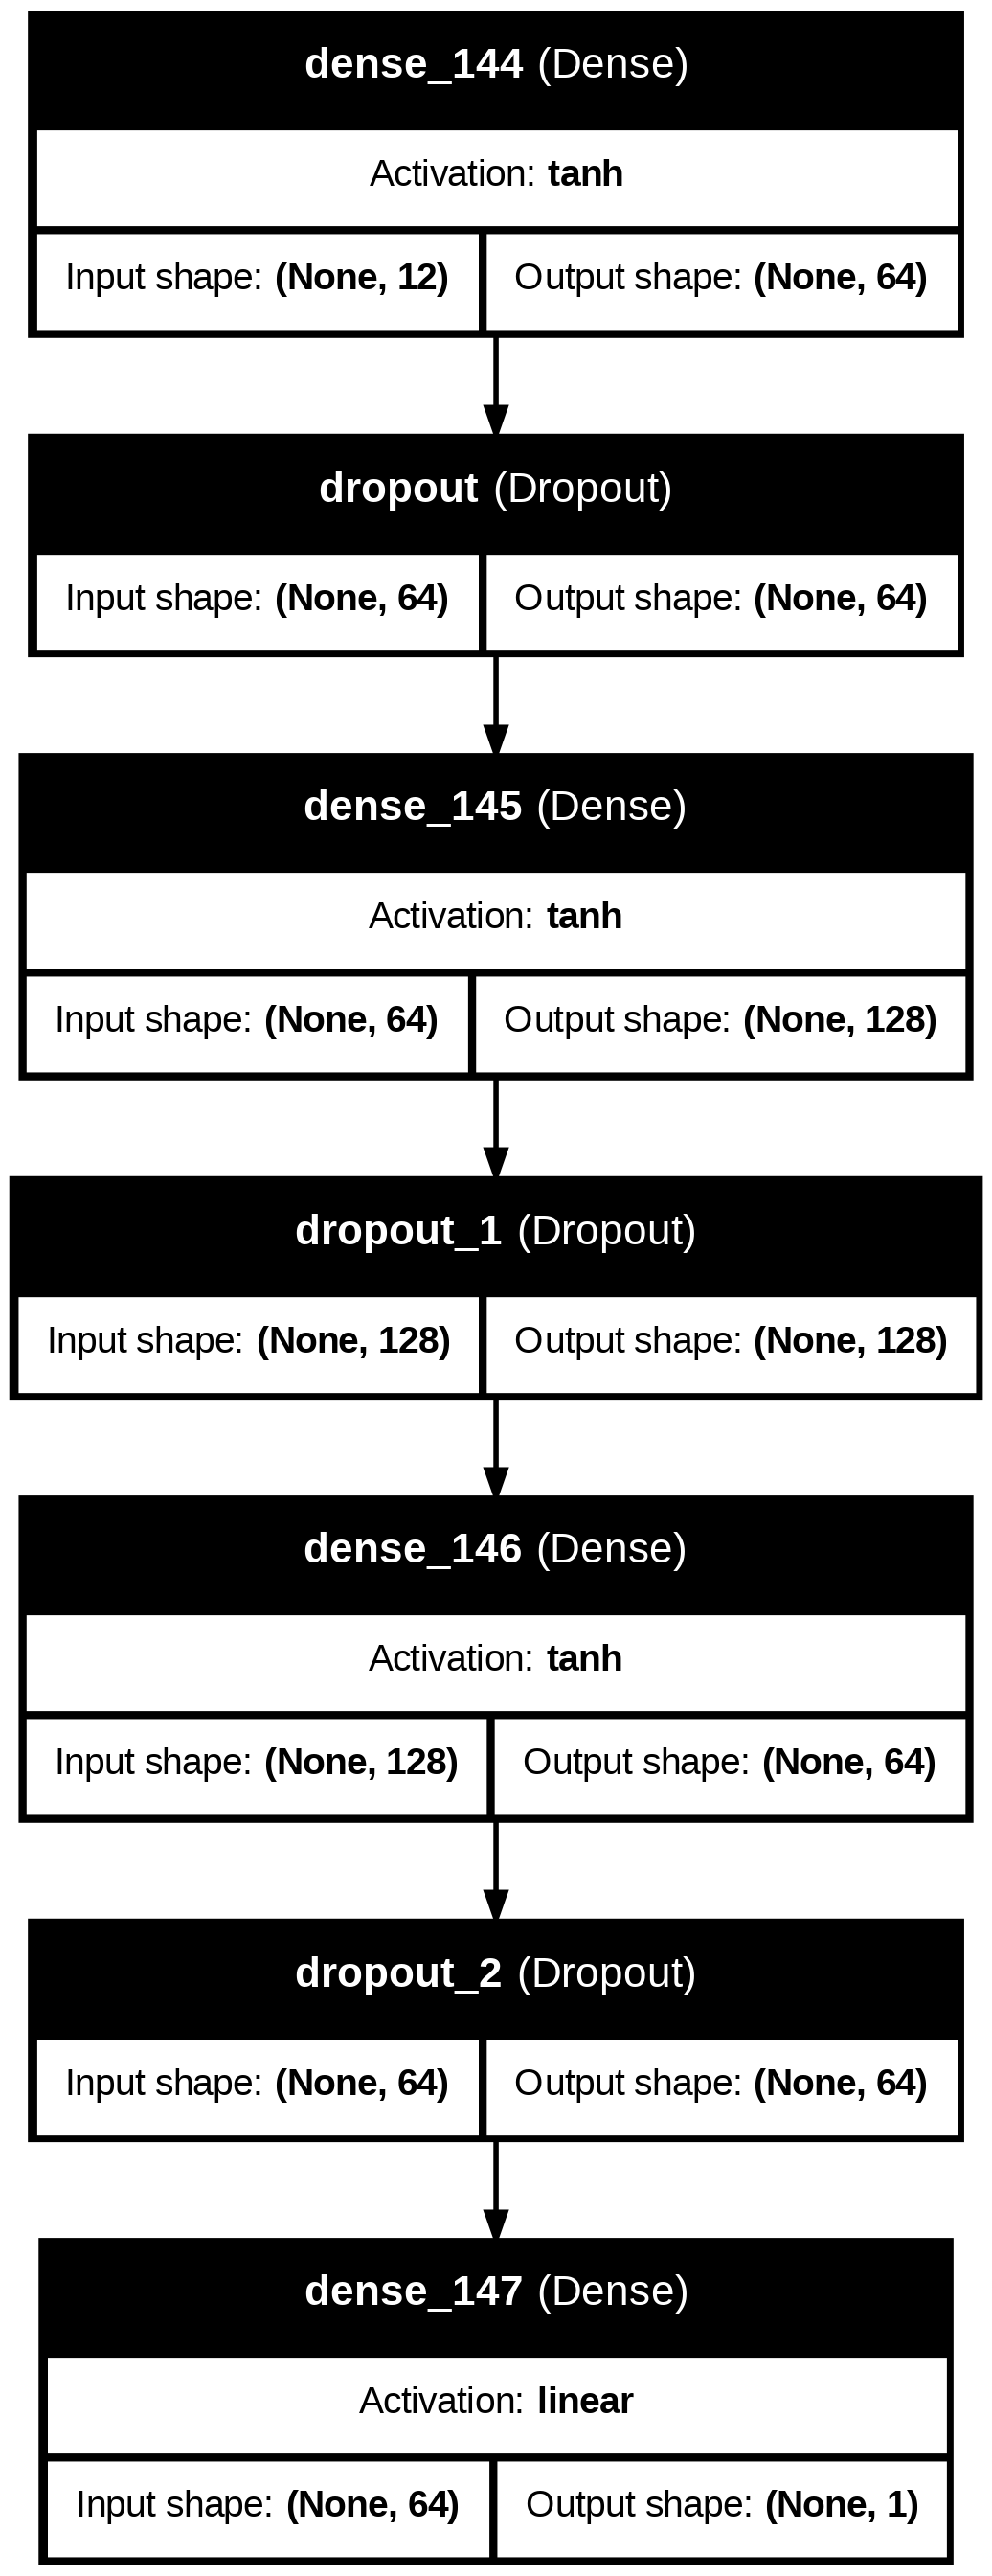

In [57]:
# архитектура нейросети
keras.utils.plot_model(model_1, show_shapes = True, show_layer_names = True, show_layer_activations = True)

In [58]:
# Функция для построения графика ошибки
def p_loss(history):
  fig, axes = plt.subplots(1, 2, figsize = (12, 5))
  axes[0].plot(history['loss'], label = 'loss')
  axes[0].plot(history['val_loss'], label = 'val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].set_xlabel('Эпоха')

  axes[1].legend()
  axes[1].grid(True)
  plt.show()

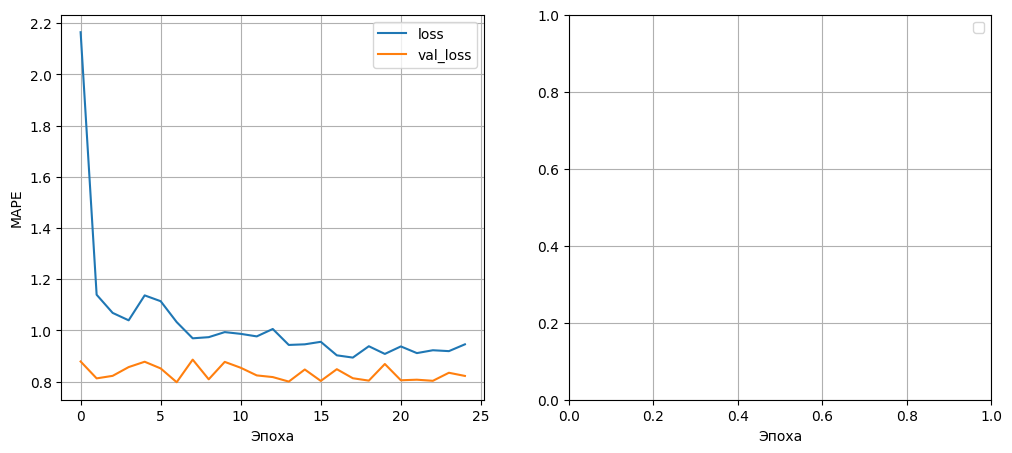

In [59]:
p_loss(history.history)

##**Результаты**

###Для ML моделей

In [60]:
ml_results = pd.concat([metrics_df_LR, BEST_DT,metrics_df_RF,metrics_df_RF,metrics_df_GB,metrics_df_SV,optimized_MLP], ignore_index=True)
# Найти модель с максимальным R^2
best_model_r2 = ml_results.loc[ml_results['R^2'].idxmax()]
print("Лучшая модель по R^2:")
best_model_r2

Лучшая модель по R^2:


,34
Model,SV_StandardScaler_y2
Model_Class,NaN
MSE,206030.987092
MAE,360.928958
R^2,-0.005709


In [61]:
metrics_df_LR

,Model,Model_Class,MSE,MAE,R^2
0,LR_default_y1,LinearRegression,9.760235,2.568891,-0.018326
1,LR_StandardScaler_y1,LinearRegression,9.760235,2.568891,-0.018326
2,LR_MinMaxScaler_y1,LinearRegression,9.760235,2.568891,-0.018326
3,LR_default_y2,LinearRegression,207163.709666,366.389264,-0.011239
4,LR_StandardScaler_y2,LinearRegression,207163.709666,366.389264,-0.011239
5,LR_MinMaxScaler_y2,LinearRegression,207163.709666,366.389264,-0.011239


In [62]:
ml_results['Target'] = np.tile(['y1', 'y1', 'y1', 'y2', 'y2', 'y2'], len(ml_results) // 6)

<Figure size 1000x600 with 0 Axes>

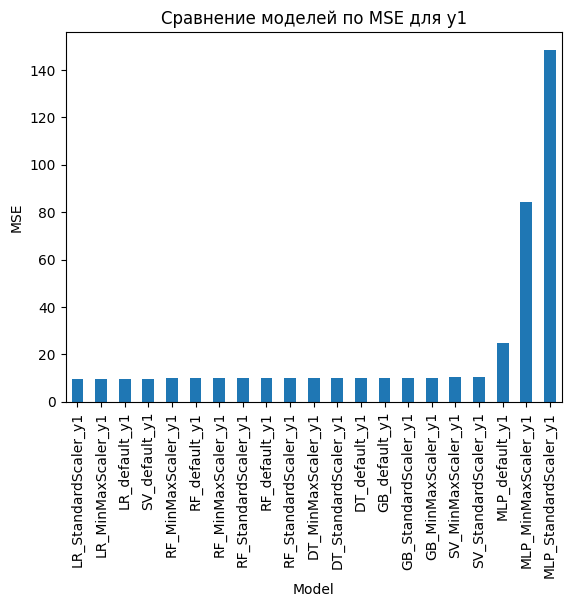

<Figure size 1000x600 with 0 Axes>

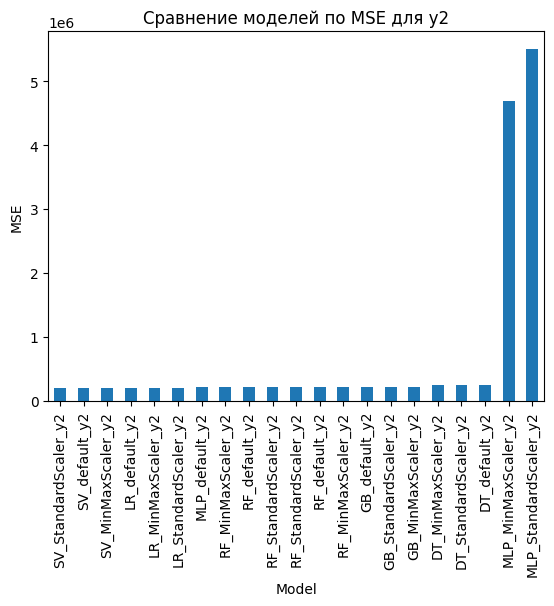

In [63]:


# График MSE для y1
plt.figure(figsize=(10, 6))
ml_results[ml_results['Target'] == 'y1'].sort_values(by='MSE').plot.bar(x='Model', y='MSE', legend=False)
plt.ylabel('MSE')
plt.title('Сравнение моделей по MSE для y1')
plt.show()

# График MSE для y2
plt.figure(figsize=(10, 6))
ml_results[ml_results['Target'] == 'y2'].sort_values(by='MSE').plot.bar(x='Model', y='MSE', legend=False)
plt.ylabel('MSE')
plt.title('Сравнение моделей по MSE для y2')
plt.show()


In [64]:
# Лучшая модель по MSE для y1
best_model_y1 = ml_results[ml_results['Target'] == 'y1'].loc[ml_results[ml_results['Target'] == 'y1']['MSE'].idxmin()]
print("Лучшая модель по MSE для y1:")
best_model_y1.head()

Лучшая модель по MSE для y1:


,1
Model,LR_StandardScaler_y1
Model_Class,LinearRegression
MSE,9.760235
MAE,2.568891
R^2,-0.018326


In [65]:
# Лучшая модель по MSE для y2
best_model_y2 = ml_results[ml_results['Target'] == 'y2'].loc[ml_results[ml_results['Target'] == 'y2']['MSE'].idxmin()]
print("Лучшая модель по MSE для y2:")
best_model_y2.head()

Лучшая модель по MSE для y2:


,34
Model,SV_StandardScaler_y2
Model_Class,NaN
MSE,206030.987092
MAE,360.928958
R^2,-0.005709


###Для нейронной сети

In [66]:
def g_m(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = r2_score(y_nn, y_pred)
    stat.loc[model_name, 'RMSE'] = root_mean_squared_error(y_nn, y_pred) * -1
    stat.loc[model_name, 'MAE'] = mean_absolute_error(y_nn, y_pred) * -1
    stat.loc[model_name, 'max_error'] = max_error(y_nn, y_pred) * -1
    return stat



In [67]:
#получение прогнозов на тестовом наборе данных
y_pred_n = model_1.predict(X_test_norm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [68]:
y_pred_n

array([[3.148736 ],
       [2.904388 ],
       [2.7907696],
       [3.0440965],
       [3.0391383],
       [2.7544794],
       [2.7624917],
       [3.1195993],
       [3.3678093],
       [2.8430731],
       [3.1062462],
       [3.2099748],
       [3.1567154],
       [3.1689186],
       [3.1816325],
       [2.9813855],
       [3.0872111],
       [2.8925705],
       [3.0606174],
       [2.9824238],
       [2.9647088],
       [2.931326 ],
       [3.0729408],
       [2.8556113],
       [2.7983246],
       [3.0628629],
       [2.9895744],
       [2.8647156],
       [2.9658585],
       [2.8779294],
       [2.904275 ],
       [2.8776274],
       [2.8021603],
       [2.9162383],
       [3.066158 ],
       [2.9704366],
       [2.9897885],
       [3.1584787],
       [3.1244268],
       [2.909908 ],
       [3.083219 ],
       [3.3086076],
       [2.957912 ],
       [3.0996785],
       [3.2431061],
       [2.93126  ],
       [3.055119 ],
       [2.9372911],
       [2.923202 ],
       [2.991838 ],


In [69]:
y_train_n

,Соотношение матрица-наполнитель
id,
800,3.109085
295,2.147299
171,2.275182
984,0.968087
510,2.669404
...,...
111,3.615181
278,2.532323
883,3.175203


In [70]:
# точность нейросети на тестовых данных
model_1.evaluate(X_test_n, y_test_n)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9098 - mae: 0.7772  


[0.9502801299095154, 0.7898979187011719]

In [71]:
# предсказание
y_pred_model_1 = model_1.predict(X_test_n)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [72]:
y_test_n
# предсказание
y_pred_model_1 = model_1.predict(X_test_n)
y_pred_model_1.shape

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(200, 1)

In [73]:
y_test_n

,Соотношение матрица-наполнитель
id,
469,2.783675
815,2.538890
216,2.509977
319,3.113267
760,2.488863
...,...
82,3.437193
32,3.277087
286,2.979501


##**Сохранение моделей**

ML моделей

In [74]:
pickle.dump(LR_StandardScaler_y1, open(r'/content/drive/MyDrive/Кейс №2/y1.pkl', 'wb'))

In [75]:
# Название нужной модели
model_key = "SV_StandardScaler_y2"

# Проверяем, что модель существует в словаре
if model_key in trained_models:
    #получаем модель(вызываем из словаря)
    SV_StandardScaler_y2 = trained_models[model_key]


In [76]:
pickle.dump(SV_StandardScaler_y2, open(r'/content/drive/MyDrive/Кейс №2/y2.pkl', 'wb'))

In [77]:
SV_StandardScaler_y2

SVR()

In [78]:
model_load_width_1 = pickle.load(open(r'/content/drive/MyDrive/Кейс №2/y1.pkl', 'rb'))

In [79]:
model_load_width_1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



array([261.57752525, 251.40351804, 307.37500999, 333.13035245,
       229.58762847, 159.05560325, 140.65841827, 174.74277573,
       295.84149135, 406.48401197, 215.97900624, 154.01465863,
       276.93114391, 278.93369183, 261.46966838, 185.31971194,
       218.07055376, 232.47120987, 270.86575094, 245.6419664 ,
       239.7268684 , 343.27905149, 282.72034456, 265.08267268,
       203.43578092, 271.42482975, 245.27923243, 328.97884194,
       225.57889147, 237.58724278, 256.85367077, 317.56043791,
       243.83991492, 225.85944487, 219.23754307, 196.98179252,
       279.3581522 , 172.69695553, 274.00928827, 191.06259488,
       276.10691718, 375.54155868, 176.03828015, 182.78560266,
       230.28872196, 245.29408908, 322.84189845, 346.63795223,
       260.61513504, 284.64753958, 185.31755048, 325.64030076,
       211.87784689, 176.77123099, 223.09792376, 217.57000679,
       253.84967191, 245.39775111, 291.88735708, 231.59719955,
       308.03508325, 223.35086108, 325.75445199, 192.62

In [80]:
model_load_width_2 = pickle.load(open(r'/content/drive/MyDrive/Кейс №2/y2.pkl', 'rb'))

In [81]:
model_load_width_2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SVR was fitted without feature names



array([2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780734,
       2464.93780734, 2464.93780734, 2464.93780734, 2464.93780

Нейронной сети

In [82]:
# Сохранение модели в формате HDF5
model_1.save("my_model.keras")

In [83]:
loaded_model = load_model("my_model.keras")

In [84]:
y_pred_11 = loaded_model.predict(X_nn)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


##**Итоги**

На основании полученных результатов можно сделать вывод, что данный датасет оказался достаточно сложным для обучения. Признаки демонстрируют слабую корреляцию как между собой, так и с целевыми переменными. В итоге, построенные модели не подходят для использования в продакшене.